##–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –æ—Ç–∫–ª–∏–∫–∞ –Ω–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—É—é –∫–∞–º–ø–∞–Ω–∏—é

**–ó–∞–¥–∞—á–∞** - –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è



**–¶–µ–ª—å** - –ü—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –æ—Ç–∫–ª–∏–∫–Ω–µ—Ç—Å—è –ª–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å –Ω–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—É—é –∫–∞–º–ø–∞–Ω–∏—é


**–¢–∞—Ä–≥–µ—Ç** - Response




##–ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫, –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö, –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑

# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫, –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö, –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [160]:
import mlflow
import os
from getpass import getpass

os.environ['MLFLOW_TRACKING_USERNAME'] = 'daryafralova'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '10deb4cbb5ca39ebabdd04f72fdd08350a6b44d2'
os.environ['MLFLOW_TRACKING_PROJECTNAME'] = 'MLFlow'

mlflow.set_tracking_uri(f'https://dagshub.com/' + os.environ['MLFLOW_TRACKING_USERNAME'] + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + '.mlflow')

In [161]:
import sys
print(sys.version)

3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]


In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
from scipy.stats import probplot
import numpy as np
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import mannwhitneyu
pd.options.display.float_format = lambda x: ('%.12f' % x).rstrip('0').rstrip('.')
from pycaret.classification import *
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import ttest_ind
import mlflow
import os
from getpass import getpass

In [163]:
gdown.download('https://drive.google.com/uc?id=17puPY2cKoC0UEmrAyWhiVqLMbrrKNjFV')

Downloading...
From: https://drive.google.com/uc?id=17puPY2cKoC0UEmrAyWhiVqLMbrrKNjFV
To: /home/alorozhkov/jup/marketing_campaign.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 220k/220k [00:00<00:00, 3.10MB/s]


'marketing_campaign.csv'

In [164]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [165]:
df.head(1)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  

[1 rows x 29 columns]

In [166]:
df.shape

(2240, 29)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [168]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [169]:
df.iloc[:, 10:20].head()

MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  
0                  4                  7  
1                  2                  5  
2                 10                  4  
3                  4                  6  
4                  6                  5

# –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö:

ID: —É–Ω–∏–∫–∞–ª—å–Ω—ã–π id –∫–ª–∏–µ–Ω—Ç–∞

Year_Birth: –¥–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è

Education: –∫–∞–∫–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ

Marital_Status: —Å–µ–º–µ–π–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ

Income: –≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥ —Å–µ–º—å–∏ –∫–ª–∏–µ–Ω—Ç–∞

Kidhome: –∫–æ–ª-–≤–æ –¥–µ—Ç–µ–π

Teenhome: –∫–æ–ª-–≤–æ –ø–æ–¥—Ä–æ—Å—Ç–∫–æ–≤

Dt_Customer: –¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–∞

Recency: –∫–æ–ª-–≤–æ –¥–Ω–µ–π —Å –ø–æ—Å–ª–µ–¥–Ω–µ–π –ø–æ–∫—É–ø–∫–∏

MntWines: —Å—É–º–º–∞, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–∞—è –Ω–∞ –≤–∏–Ω–æ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞

MntFruits: —Å—É–º–º–∞, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–∞—è –Ω–∞ —Ñ—Ä—É–∫—Ç—ã –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞

MntMeatProducts: —Å—É–º–º–∞, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–∞—è –Ω–∞ –º—è—Å–æ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞

MntFishProducts: —Å—É–º–º–∞, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–∞—è –Ω–∞ —Ä—ã–±—É –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞

MntSweetProducts: —Å—É–º–º–∞, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–∞—è –Ω–∞ —Å–ª–∞–¥–æ—Å—Ç–∏ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞

MntGoldProds: —Å—É–º–º–∞, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–∞—è –Ω–∞ –ø—Ä–µ–º–∏—É–º —Ç–æ–≤–∞—Ä—ã –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 2 –≥–æ–¥–∞

NumDealsPurchases: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–æ–∫, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö —Å–æ —Å–∫–∏–¥–∫–æ–π

NumWebPurchases:  –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–æ–∫, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö –æ–Ω–ª–∞–π–Ω

NumCatalogPurchases:  –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–æ–∫, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–∞—Ç–∞–ª–æ–≥–∞

NumStorePurchases: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–æ–∫, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –≤ –º–∞–≥–∞–∑–∏–Ω–∞—Ö

NumWebVisitsMonth: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–µ—â–µ–Ω–∏–π –≤–µ–±-—Å–∞–π—Ç–∞ –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü

AcceptedCmp3: 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –ø—Ä–∏–Ω—è–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –≤ 3-–π –∫–∞–º–ø–∞–Ω–∏–∏, –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ 0

AcceptedCmp4: 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –ø—Ä–∏–Ω—è–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –≤ 4-–π –∫–∞–º–ø–∞–Ω–∏–∏, –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ 0

AcceptedCmp5: 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –ø—Ä–∏–Ω—è–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –≤ 5-–π –∫–∞–º–ø–∞–Ω–∏–∏, –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ 0

AcceptedCmp1: 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –ø—Ä–∏–Ω—è–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –≤ —Ä–∞–º–∫–∞—Ö 1-–π –∫–∞–º–ø–∞–Ω–∏–∏, –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ 0

AcceptedCmp2: 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –ø—Ä–∏–Ω—è–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –≤–æ –≤—Ä–µ–º—è 2-–π –∫–∞–º–ø–∞–Ω–∏–∏, –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ 0

Complain: 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –∂–∞–ª–æ–≤–∞–ª—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 2 –ª–µ—Ç, 0 –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ

Z_CostContact: —É–¥–∞–ª—è—é, —Ç.–∫. –¥–∞–Ω–Ω—ã–µ –∏–º–µ.—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–æ –≤—Å–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ
Z_Revenue: —É–¥–∞–ª—è—é, —Ç.–∫. –¥–∞–Ω–Ω—ã–µ –∏–º–µ.—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–æ –≤—Å–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ

Response: 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –ø—Ä–∏–Ω—è–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –≤ —Ä–∞–º–∫–∞—Ö –ø–æ—Å–ª–µ–¥–Ω–µ–π –∫–∞–º–ø–∞–Ω–∏–∏, 0 –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [170]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [171]:
#–í—ã–≤–æ–∂—É —Å—Ç–æ–ª–±—Ü—ã —É –∫–æ–≥–æ —Ç–æ–∂–µ Income == NaN
df[df['Income'].isna()][['ID', 'Education', 'Marital_Status', 'Year_Birth']]

ID   Education Marital_Status  Year_Birth
10     1994  Graduation        Married        1983
27     5255  Graduation         Single        1986
43     7281         PhD         Single        1959
48     7244  Graduation         Single        1951
58     8557  Graduation         Single        1982
71    10629    2n Cycle        Married        1973
90     8996         PhD        Married        1957
91     9235  Graduation         Single        1957
92     5798      Master       Together        1973
128    8268         PhD        Married        1961
133    1295  Graduation        Married        1963
312    2437  Graduation        Married        1989
319    2863  Graduation         Single        1970
1379  10475      Master       Together        1970
1382   2902  Graduation       Together        1958
1383   4345    2n Cycle         Single        1964
1386   3769         PhD       Together        1972
2059   7187      Master       Together        1969
2061   1612         PhD         Single        1981
2078   5079  Graduation        Married        1971
2079  10339      Master       Together        1954
2081   3117  Graduation         Single        1955
2084   5250      Master          Widow        1943
2228   8720    2n Cycle       Together        1978

In [172]:
#–ì—Ä—É–ø–ø–∏—Ä—É—é –ø–æ Education –∏ –∑–∞–ø–æ–ª–Ω—è—é NaN –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–æ Education
data = df.copy()
data['Income'] = data.groupby('Education')['Income'].transform(
    lambda x: x.fillna(x.median())
)

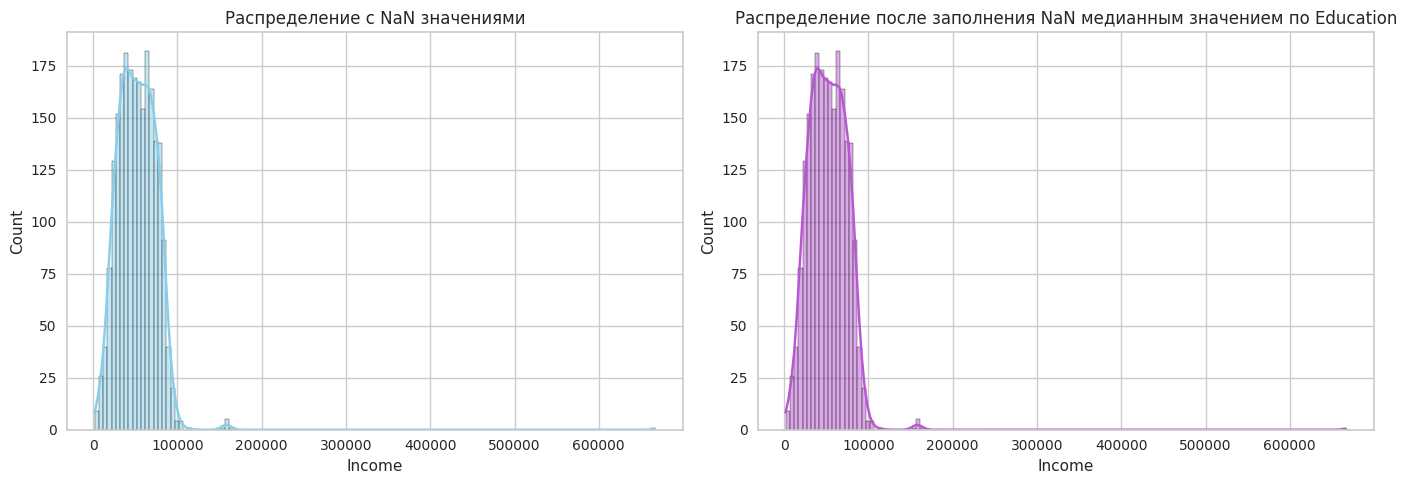

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data['Income'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å NaN –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')
axes[0].set_xlabel('Income')

sns.histplot(data['Income'], kde=True, ax=axes[1], color='mediumorchid')
axes[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è NaN –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–æ Education')
axes[1].set_xlabel('Income')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.tight_layout()
plt.show()

In [174]:
data.duplicated().sum()

0

In [175]:
data.describe().T

count               mean                std  min  \
ID                    2240  5592.159821428571  3246.662197564341    0   
Year_Birth            2240  1968.805803571429    11.984069456886 1893   
Income                2240 52242.594866071428 25039.061737557713 1730   
Kidhome               2240     0.444196428571     0.538398097735    0   
Teenhome              2240            0.50625      0.54453823077    0   
Recency               2240          49.109375    28.962452808378    0   
MntWines              2240   303.935714285714   336.597392605372    0   
MntFruits             2240    26.302232142857    39.773433764579    0   
MntMeatProducts       2240             166.95   225.715372511754    0   
MntFishProducts       2240    37.525446428571    54.628979402878    0   
MntSweetProducts      2240    27.062946428571    41.280498487855    0   
MntGoldProds          2240          44.021875    52.167438914997    0   
NumDealsPurchases     2240              2.325     1.932237500856    0   
NumWebPurchases       2240     4.084821428571     2.778714147388    0   
NumCatalogPurchases   2240     2.662053571429      2.92310065554    0   
NumStorePurchases     2240     5.790178571429     3.250958145674    0   
NumWebVisitsMonth     2240     5.316517857143     2.426645009547    0   
AcceptedCmp3          2240     0.072767857143     0.259813069922    0   
AcceptedCmp4          2240     0.074553571429     0.262728284854    0   
AcceptedCmp5          2240     0.072767857143     0.259813069922    0   
AcceptedCmp1          2240     0.064285714286     0.245315974334    0   
AcceptedCmp2          2240     0.013392857143     0.114975606255    0   
Complain              2240           0.009375     0.096391167944    0   
Z_CostContact         2240                  3                  0    3   
Z_Revenue             2240                 11                  0   11   
Response              2240     0.149107142857     0.356273586408    0   

                         25%     50%      75%    max  
ID                   2828.25  5458.5  8427.75  11191  
Year_Birth              1959    1970     1977   1996  
Income              35538.75 51498.5 68289.75 666666  
Kidhome                    0       0        1      2  
Teenhome                   0       0        1      2  
Recency                   24      49       74     99  
MntWines               23.75   173.5   504.25   1493  
MntFruits                  1       8       33    199  
MntMeatProducts           16      67      232   1725  
MntFishProducts            3      12       50    259  
MntSweetProducts           1       8       33    263  
MntGoldProds               9      24       56    362  
NumDealsPurchases          1       2        3     15  
NumWebPurchases            2       4        6     27  
NumCatalogPurchases        0       2        4     28  
NumStorePurchases          3       5        8     13  
NumWebVisitsMonth          3       6        7     20  
AcceptedCmp3               0       0        0      1  
AcceptedCmp4               0       0        0      1  
AcceptedCmp5               0       0        0      1  
AcceptedCmp1               0       0        0      1  
AcceptedCmp2               0       0        0      1  
Complain                   0       0        0      1  
Z_CostContact              3       3        3      3  
Z_Revenue                 11      11       11     11  
Response                   0       0        0      1

**–í—ã–≤–æ–¥:**
*   **Year_Birth**  - –ù—É–∂–Ω–æ –ø—Ä–µ–≤—Ä–∞—Ç–∏—Ç—å –≤ –≤–æ–∑—Ä–∞—Å—Ç –∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞ –≤—ã–±—Ä–æ—Å—ã (–ª—é–¥–∏ 120+ –ª–µ—Ç ‚Äî –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ)
*   **Kidhome / Teenhome** - –ë–∏–Ω–∞—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –º–∞–∫—Å–∏–º—É–º 2 ‚Äî –æ–±—ä–µ–¥–∏–Ω—é  –∏—Ö –≤ —Ñ–∏—á—É HasChildren
*   **AcceptedCmp5/3/1/2/4** - –û–±—ä–µ–¥–∏–Ω—è—é –≤ —Ñ–∏—á—É TotalAcceptedCmp
*   **NumCatalogPurchases/NumWebPurchases/NumStorePurchases** - –æ–±—ä–µ–¥–∏–Ω—è—é –≤ –æ–¥–Ω—É —Ñ–∏—á—É AvgPurchaseActivity
*   **MaritalStatus** - –í –Ω–æ–≤—É—é —Ñ–∏—á—É MaritalStatus_2 —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ 0 - Not Partnered –∏–ª–∏ 1=Maried
*   **Education** - –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
*   **MntWines/MntFruits/MntMeatProducts/MntFishProducts/MntSweetProducts/MntGoldProds** - –í –Ω–æ–≤—É—é —Ñ–∏—á—É TotalSpent


### –§–∏—á–∞ Age

In [176]:
data['Age'] = 2025 - data['Year_Birth']

In [177]:
data[data['Age'] > 100]

ID  Year_Birth Education Marital_Status  Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced   36640        1         0   
239  11004        1893  2n Cycle         Single   60182        0         1   
339   1150        1899       PhD       Together   83532        0         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192  26-09-2013       99        15  ...             0             0   
239  17-05-2014       23         8  ...             0             0   
339  26-09-2013       36       755  ...             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  Age  
192         11         0  125  
239         11         0  132  
339         11         0  126  

[3 rows x 30 columns]

In [178]:
data = data[(data['Age'] <= 100)]

In [179]:
data['Age'].max()

85

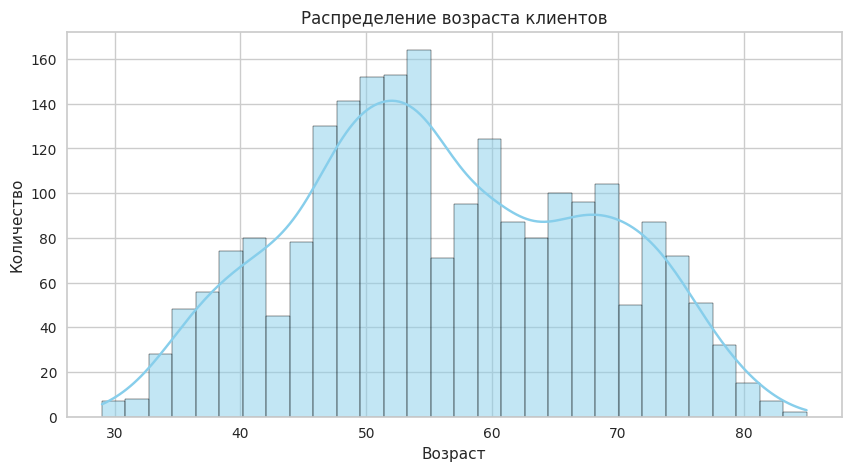

In [180]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()

### –§–∏—á–∞ HasChildren

In [181]:
data.head(3)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   68  
1         11         0   71  
2         11         0   60  

[3 rows x 30 columns]

In [182]:
data['TotalChildren'] = data['Kidhome'] + data['Teenhome']

In [183]:
data[['Kidhome', 'Teenhome', 'TotalChildren']].head()

Kidhome  Teenhome  TotalChildren
0        0         0              0
1        1         1              2
2        0         0              0
3        1         0              1
4        1         0              1

In [184]:
# –°–æ–∑–¥–∞—é —Ñ–∏—á—É HasChildren
data['HasChildren'] = (data['TotalChildren'] > 0).astype(int)

### –§–∏—á–∞ Marital_Status

In [185]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [186]:
# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ñ–∏—á–∏ MaritalFlag 
data['MaritalFlag'] = data['Marital_Status'].isin(['Married', 'Together']).astype(int)

### –§–∏—á–∞ TotalSpent

In [187]:
mnt_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]
data['TotalSpent'] = data[mnt_cols].sum(axis=1)

In [188]:
data.groupby('Response')['TotalSpent'].describe()

count             mean              std  min  25%    50%  75%  max
Response                                                                    
0          1903 538.759327377824  552.48492648357    5   62    315  955 2525
1           334 987.392215568862 719.009695206596   17  252 1057.5 1617 2525

**–õ—é–¥–∏ —Å (Response = 1), —Ç—Ä–∞—Ç—è—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ**



### –§–∏—á–∞ Customer_Since_Years  

In [189]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)
data['Customer_Since_Days'] = (pd.Timestamp.today() - data['Dt_Customer']).dt.days

In [190]:
data['Customer_Since_Years'] = (data['Customer_Since_Days'] / 365.25).astype(int)

In [191]:
data.head(3)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-09-04       58       635  ...              3         11         1   
1  2014-03-08       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   

   Age  TotalChildren  HasChildren  MaritalFlag  TotalSpent  \
0   68              0            0            0        1617   
1   71              2            1            0          27   
2   60              0            0            1         776   

   Customer_Since_Days  Customer_Since_Years  
0                 4639                    12  
1                 4089                    11  
2                 4288                    11  

[3 rows x 36 columns]

### –§–∏—á–∞ TotalPurchaseActivity

In [192]:
# –°–æ–∑–¥–∞—é –§–∏—á—É –≤–æ–≤–ª–µ—á–µ–Ω–Ω–æ—Å—Ç–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—è
data['TotalPurchaseActivity'] = data[['NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases']].sum(axis=1)

In [193]:
data.head(3)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  Age  \
0  2012-09-04       58       635  ...         11         1   68   
1  2014-03-08       38        11  ...         11         0   71   
2  2013-08-21       26       426  ...         11         0   60   

   TotalChildren  HasChildren  MaritalFlag  TotalSpent  Customer_Since_Days  \
0              0            0            0        1617                 4639   
1              2            1            0          27                 4089   
2              0            0            1         776                 4288   

   Customer_Since_Years  TotalPurchaseActivity  
0                    12                     22  
1                    11                      4  
2                    11                     20  

[3 rows x 37 columns]

### –§–∏—á–∞ —É—á–∞—Å—Ç–∏—è –≤ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∫–∞–º–ø–∞–Ω–∏—è—Ö TotalAcceptedCmp

In [194]:
data['TotalAcceptedCmp'] = data[['AcceptedCmp1', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp4']].sum(axis=1)

### –°–æ–∑–¥–∞–Ω–∏–µ —Ñ–∏—á–∏ HigherEducatuin (–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ Education –∫ –±–∏–Ω–∞—Ä–Ω–æ–º—É —Ç–∏–ø—É –¥–∞–Ω–Ω—ã—Ö)

In [195]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [196]:
higher_edu = ['Graduation', 'Master', 'PhD']
data['HigherEducation'] = data['Education'].isin(higher_edu).astype(int)

### –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

In [197]:
data.drop(['NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases'], axis=1, inplace=True) 

In [198]:
data.drop(['AcceptedCmp1', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp4'], axis=1, inplace=True) 

In [199]:
data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True) 

In [200]:
data.drop(['Marital_Status', 'Education', 'Kidhome', 'Teenhome', 'TotalChildren', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Customer_Since_Days'], axis=1, inplace=True)

In [201]:
data.head(5)

ID  Income  Recency  NumWebVisitsMonth  Complain  Response  Age  \
0  5524   58138       58                  7         0         1   68   
1  2174   46344       38                  5         0         0   71   
2  4141   71613       26                  4         0         0   60   
3  6182   26646       26                  6         0         0   41   
4  5324   58293       94                  5         0         0   44   

   HasChildren  MaritalFlag  TotalSpent  Customer_Since_Years  \
0            0            0        1617                    12   
1            1            0          27                    11   
2            0            1         776                    11   
3            1            1          53                    11   
4            1            1         422                    11   

   TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  
0                     22                 0                1  
1                      4                 0                1  
2                     20                 0                1  
3                      6                 0                1  
4                     14                 0                1

In [202]:
## Feature eng_1

In [203]:
#–°–º–æ—Ç—Ä—é feture eng –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
features_1 = ['ID', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age', 'HasChildren', 'MaritalFlag', 'TotalSpent', 
            'Customer_Since_Years', 
            'TotalPurchaseActivity',
            'TotalAcceptedCmp', 'HigherEducation']
        
X = data[features_1]
y = data['Response']


In [204]:
def fit_catboost_model(X, y, features=None):
    X_filtered = X[features] if features else X

    # –†–∞—Å—á–µ—Ç –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–∏–º–µ—Ä —Å –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π)
    class_counts = y.value_counts()
    total = len(y)
    class_weights = [total / class_counts[cls] for cls in sorted(class_counts.index)]

    model = CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.1,
        verbose=False,
        class_weights=class_weights
    )

    model.fit(X_filtered, y)

    feature_importance = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X_filtered.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    y_pred = model.predict(X_filtered)

    display(feature_importance_df)

    return model

In [205]:
from catboost import CatBoostClassifier

In [206]:
_ = fit_catboost_model(X, y)

Feature      Importance
2                 Recency 17.081695325015
1                  Income 12.545365125507
8              TotalSpent 11.388274338092
0                      ID 10.349810307995
5                     Age  9.924043117223
11       TotalAcceptedCmp  9.025349456156
3       NumWebVisitsMonth  7.748648490103
9    Customer_Since_Years  6.400197297268
10  TotalPurchaseActivity  5.470325300573
7             MaritalFlag  5.254006720551
6             HasChildren  3.592224282622
12        HigherEducation  1.210731599346
4                Complain  0.009328639549

In [207]:
from tqdm import tqdm

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:09<00:00,  1.03it/s]


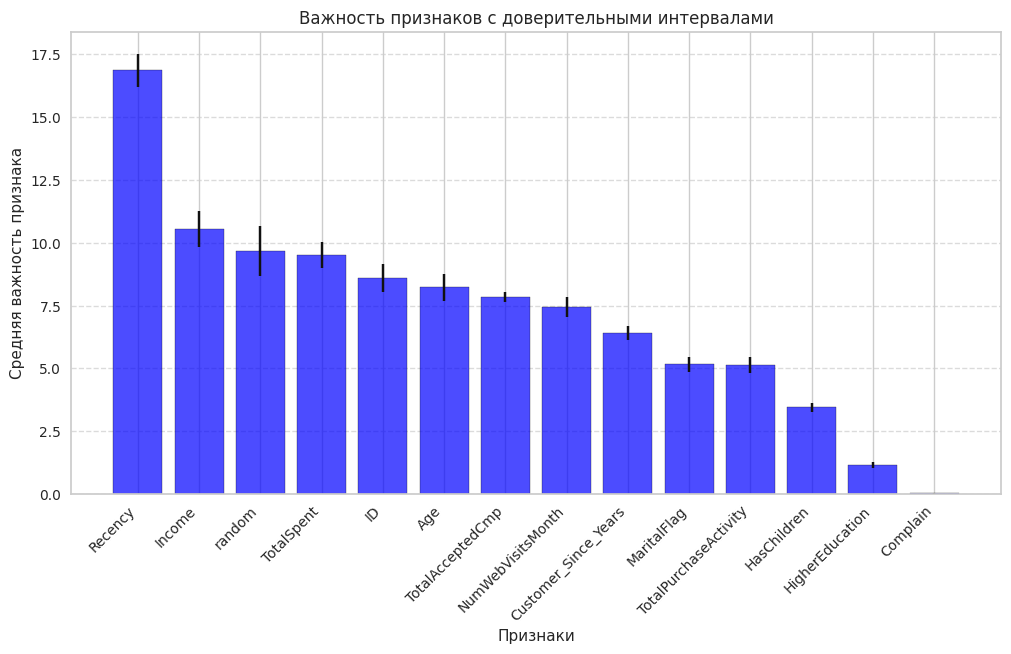

In [208]:
n_iterations = 10
features = list(X.columns) + ['random']

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_records = {feature: [] for feature in features}

# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ –º–Ω–æ–≥–æ —Ä–∞–∑
for _ in tqdm(range(n_iterations)):
    X['random'] = np.random.random(size=len(X))
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
    model.fit(X, y)

    # –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    feature_importance = model.feature_importances_

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å–ª–æ–≤–∞—Ä—å
    for feature, importance in zip(X.columns, feature_importance):
        feature_importance_records[feature].append(importance)

# –°–æ–∑–¥–∞—ë–º DataFrame —Å –∏—Ç–æ–≥–æ–≤—ã–º–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏
feature_importance_stats = pd.DataFrame({
    'feature': list(feature_importance_records.keys()),
    'mean': [np.mean(values) for values in feature_importance_records.values()],
    'std': [np.std(values) for values in feature_importance_records.values()]
}).sort_values(by='mean', ascending=False)

# display(feature_importance_stats)

plt.figure(figsize=(12, 6))
plt.bar(
    feature_importance_stats['feature'], 
    feature_importance_stats['mean'], 
    yerr=feature_importance_stats['std'], 
    capsize=5, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)

plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

In [209]:
import shap 
from catboost import CatBoostClassifier

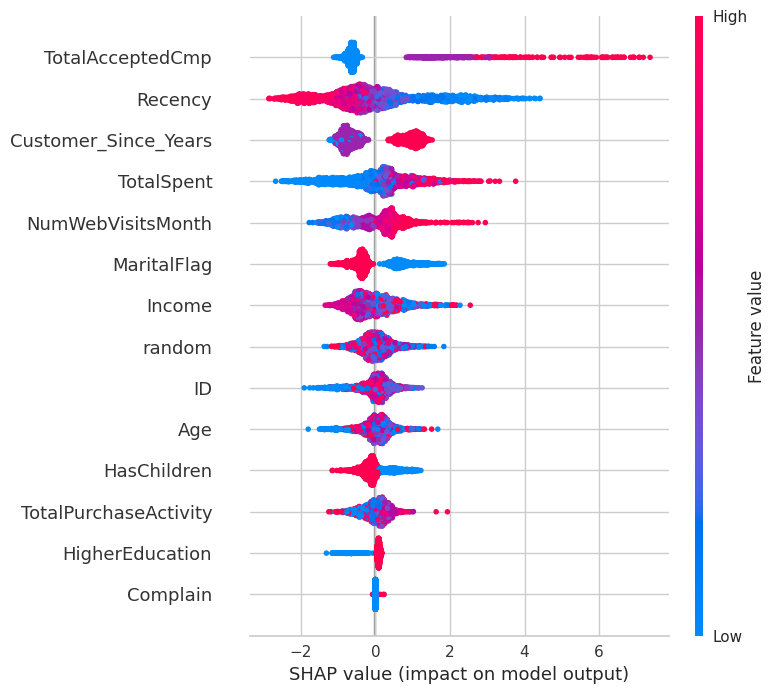

In [210]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
model.fit(X, y)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

In [211]:
data.describe().T

count               mean                std  min   25%  \
ID                      2237  5590.726419311578  3245.118591497697    0  2829   
Income                  2237 52232.033303531513 25044.375877751736 1730 35523   
Recency                 2237    49.104604380867    28.956073098902    0    24   
NumWebVisitsMonth       2237     5.319177469826      2.42638552774    0     3   
Complain                2237     0.008940545373     0.094151870551    0     0   
Response                2237     0.149307107734     0.356470615409    0     0   
Age                     2237    56.098345999106    11.701917260311   29    48   
HasChildren             2237     0.715243629861     0.451399231996    0     0   
MaritalFlag             2237     0.645060348681     0.478602017608    0     0   
TotalSpent              2237   605.743406347787   601.840466114246    5    69   
Customer_Since_Years    2237    11.372373714797     0.585610355255   10    11   
TotalPurchaseActivity   2237    12.544032185963     7.205919377435    0     6   
TotalAcceptedCmp        2237      0.29772016093     0.678614806664    0     0   
HigherEducation         2237     0.886008046491     0.317872548361    0     1   

                        50%   75%    max  
ID                     5455  8427  11191  
Income                51479 68281 666666  
Recency                  49    74     99  
NumWebVisitsMonth         6     7     20  
Complain                  0     0      1  
Response                  0     0      1  
Age                      55    66     85  
HasChildren               1     1      1  
MaritalFlag               1     1      1  
TotalSpent              396  1045   2525  
Customer_Since_Years     11    12     12  
TotalPurchaseActivity    12    18     32  
TotalAcceptedCmp          0     0      4  
HigherEducation           1     1      1

–í—ã–≤–æ–¥ –ø–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ:
- Income - –ú–∞–∫—Å–∏–º—É–º 666666 ‚Äî –≤—ã–≥–ª—è–¥–∏—Ç –∫–∞–∫ —è–≤–Ω–∞—è –∞–Ω–æ–º–∞–ª–∏—è (–≤ 10 —Ä–∞–∑ –≤—ã—à–µ 75-–≥–æ –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—è = 68281)
- Complain - –û—á–µ–Ω—å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞. –ü–æ—á—Ç–∏ –≤—Å–µ = 0
- Response - –û—á–µ–Ω—å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞. –ë—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Class weights –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏
- Age- –≤—Å–µ –æ–∫
- HasChildren, MaritalFlag, HigherEducation - –£–∂–µ –±–∏–Ω–∞—Ä–Ω—ã–µ –∏ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ. –ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞–∫ –µ—Å—Ç—å
- TotalSpent- –û—á–µ–Ω—å —à–∏—Ä–æ–∫–∏–π —Ä–∞–∑–±—Ä–æ—Å (–æ—Ç 5 –¥–æ 2525), –∏ —Å—Ä–µ–¥–Ω–µ–µ –ø–æ—á—Ç–∏ —Ä–∞–≤–Ω–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º—É –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—é.
- Customer_Since_Years-–ú–∏–Ω–∏–º—É–º = 10, –º–∞–∫—Å–∏–º—É–º = 12 ‚Üí –Ω–∏–∑–∫–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è, –ø–æ—á—Ç–∏ –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è.–≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —ç—Ç–∞ —Ñ–∏—á–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ –æ—á–µ–Ω—å –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ–π, –µ—Å–ª–∏ –≤—Å–µ –∫–ª–∏–µ–Ω—Ç—ã –ø–æ—Ö–æ–∂–∏ –ø–æ –≤—Ä–µ–º–µ–Ω–∏, –∫–æ–≥–¥–∞ –Ω–∞—á–∞–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–∞–º–∏.
- TotalPurchaseActivity- –û—Ç–ª–∏—á–Ω–∞—è —Ñ–∏—á–∞, —Ä–∞–∑—É–º–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞.–ú–æ–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏: df['IsHighlyActive'] = (df['TotalPurchaseActivity'] > 20).astype(int)
- TotalAcceptedCmp-–°—Ä–µ–¥–Ω–µ–µ = 0.3, –º–∞–∫—Å–∏–º—É–º = 4 ‚Äî –∑–Ω–∞—á–∏—Ç, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –Ω–µ –ø—Ä–∏–Ω—è–ª–∏ –Ω–∏ –æ–¥–Ω–æ–π –∫–∞–º–ø–∞–Ω–∏–∏.–ú–æ–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –±–∏–Ω–∞—Ä–Ω—ã–π —Ñ–ª–∞–≥:df['HasAcceptedCmp'] = (df['TotalAcceptedCmp'] > 0).astype(int)

–ß—Ç–æ –±—É–¥—É –¥–µ–ª–∞—Ç—å?
- Income- –∞–Ω–∞–ª–∏–∑ –∏ –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –≤—ã–±—Ä–æ—Å—ã
- –°omplain - —É–¥–∞–ª—é
- Response - –ë—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Class weights –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏
- TotalSpent - –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É—é
- Customer_Since_Years - —É–¥–∞–ª—é
- TotalPurchaseActivity - —Å–æ–∑–¥–∞–º –Ω–∞ –µ–µ –æ—Å–Ω–æ–≤–µ –±–∏–Ω–∞—Ä–Ω—ã–π –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
- TotalAcceptedCmp - —Å–æ–∑–¥–∞–º –±–∏–Ω–∞—Ä–Ω—ã–π —Ñ–ª–∞–≥

In [212]:
# –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ TotalSpent
data['LogTotalSpent'] = np.log1p(data['TotalSpent'])

In [213]:
# –û–∫—Ä—É–≥–ª–µ–Ω–∏–µ –¥–ª—è –ª—É—á—à–µ–π —Ä–∞–±–æ—Ç—ã —Å –≥—Ä–∞—Ñ–∏–∫–∞–º–∏
data['LogTotalSpentRounded'] = data['LogTotalSpent'].round(1)

In [214]:
# –£–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
data.drop(['Complain', 'Customer_Since_Years', 'TotalSpent', 'ID'], axis=1, inplace=True) 

In [215]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  \
0            0                     22                 0                1   
1            0                      4                 0                1   

   LogTotalSpent  LogTotalSpentRounded  
0 7.388946097618                   7.4  
1 3.332204510175                   3.3

## Feature eng_2 –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

In [216]:
#–°–º–æ—Ç—Ä—é feture eng –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
features_1 = ['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'HasChildren', 'MaritalFlag',  
            'TotalPurchaseActivity',
            'TotalAcceptedCmp', 'HigherEducation', 'LogTotalSpent']
        
X = data[features_1]
y = data['Response']

In [217]:
def fit_catboost_model(X, y, features=None):
    X_filtered = X[features] if features else X

    # –†–∞—Å—á–µ—Ç –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–∏–º–µ—Ä —Å –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π)
    class_counts = y.value_counts()
    total = len(y)
    class_weights = [total / class_counts[cls] for cls in sorted(class_counts.index)]

    model = CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.1,
        verbose=False,
        class_weights=class_weights
    )

    model.fit(X_filtered, y)

    feature_importance = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X_filtered.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    y_pred = model.predict(X_filtered)

    display(feature_importance_df)

    return model

In [218]:
_ = fit_catboost_model(X, y)

Feature      Importance
1                Recency 17.402597317256
0                 Income 16.571766809117
9          LogTotalSpent 15.290485996748
3                    Age 12.393375685696
2      NumWebVisitsMonth 11.046109881276
7       TotalAcceptedCmp  8.864163521693
6  TotalPurchaseActivity  7.837089908865
5            MaritalFlag  5.565681490951
4            HasChildren  3.910848026596
8        HigherEducation  1.117881361801

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:08<00:00,  1.15it/s]


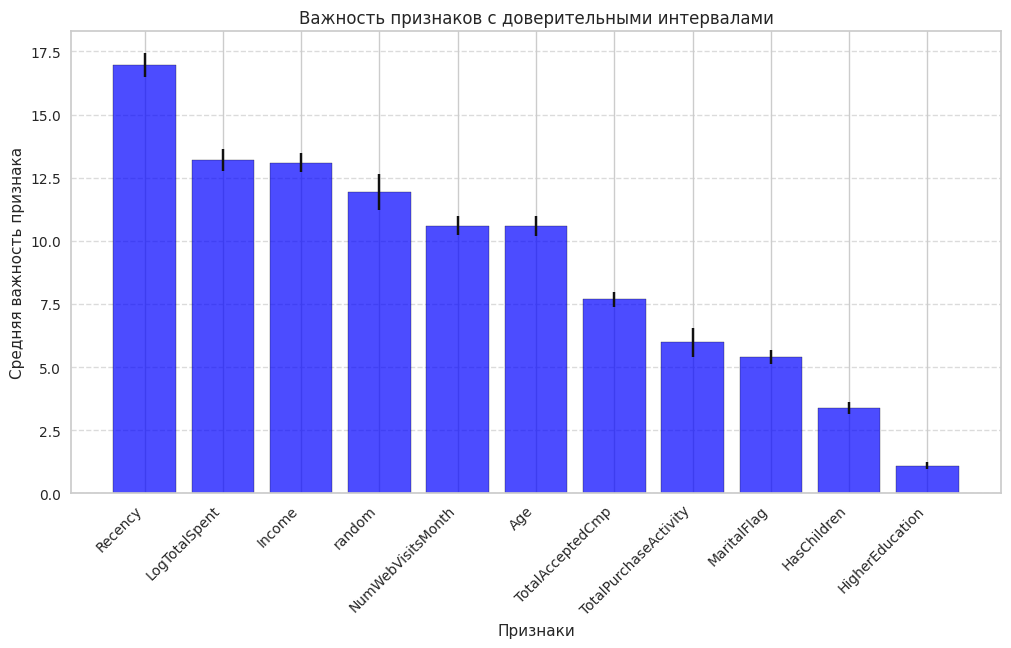

In [219]:
n_iterations = 10
features = list(X.columns) + ['random']

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_records = {feature: [] for feature in features}

# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ –º–Ω–æ–≥–æ —Ä–∞–∑
for _ in tqdm(range(n_iterations)):
    X['random'] = np.random.random(size=len(X))
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
    model.fit(X, y)

    # –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    feature_importance = model.feature_importances_

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å–ª–æ–≤–∞—Ä—å
    for feature, importance in zip(X.columns, feature_importance):
        feature_importance_records[feature].append(importance)

# –°–æ–∑–¥–∞—ë–º DataFrame —Å –∏—Ç–æ–≥–æ–≤—ã–º–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏
feature_importance_stats = pd.DataFrame({
    'feature': list(feature_importance_records.keys()),
    'mean': [np.mean(values) for values in feature_importance_records.values()],
    'std': [np.std(values) for values in feature_importance_records.values()]
}).sort_values(by='mean', ascending=False)

# display(feature_importance_stats)

plt.figure(figsize=(12, 6))
plt.bar(
    feature_importance_stats['feature'], 
    feature_importance_stats['mean'], 
    yerr=feature_importance_stats['std'], 
    capsize=5, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)

plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

In [220]:
cond = feature_importance_stats['feature'] == 'random'
random_mean_importance = feature_importance_stats.loc[cond, 'mean'].values[0]

cond = feature_importance_stats['mean'] > random_mean_importance
better_than_random = feature_importance_stats[cond]

features = better_than_random['feature'].to_list()

In [221]:
_ = fit_catboost_model(X, y, features)

Feature      Importance
1  LogTotalSpent 36.985222520704
2         Income 34.608223854332
0        Recency 28.406553624964

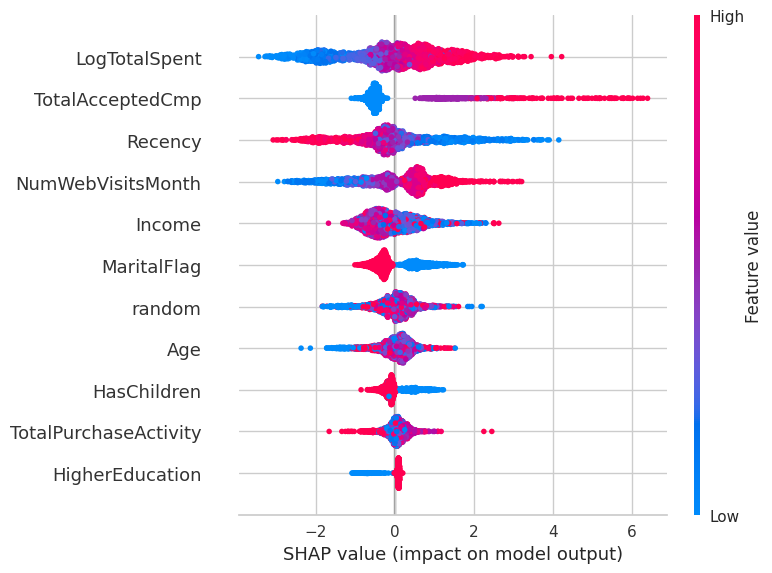

In [222]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
model.fit(X, y)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

–í—ã–≤–æ–¥ –ø–æ SHAP:
- LogTotalSpent - —Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—Ç–æ—Ä–æ–≥–æ —Å–∏–ª—å–Ω–æ –ø–æ–≤—ã—à–∞—é—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–ª–∏–∫–∞.
- TotalAcceptedCmp - —Å–∏–ª—å–Ω–æ–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö --> –ª—é–¥–∏ —É—á–∞—Å—Ç–≤–æ–≤–∞–≤—à–∏–µ –≤ –ø—Ä–æ—à–ª—ã—Ö –∫–∞–º–ø–∞–Ω–∏—è—Ö —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è
- Recency - –Ω–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–≤—ã—à–∞—é—Ç –æ—Ç–∫–ª–∏–∫. –¢.–µ. —á–µ–º –º–µ–Ω—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–æ—à–ª–æ —Å –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –æ—Ç–∫–ª–∏–∫–∞, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å –Ω–æ–≤–æ–≥–æ –æ—Ç–∫–ª–∏–∫–∞.
- NumWebVisitsMonth - –ø—Ä–∏ –±–æ–ª—å—à–æ–º —á–∏—Å–ª–µ –≤–∏–∑–∏—Ç–æ–≤ –æ—Ç–∫–ª–∏–∫ –±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–µ–Ω
- MaritalFlag - –ª—é–¥–∏, –Ω–µ —Å–æ—Å—Ç–æ—è–≤—à–∏–µ –≤ –±—Ä–∞–∫–µ –∏–º–µ—é—Ç –±–æ–ª—å—à—É—é —Ç–µ–Ω–µ–¥–µ–Ω—Ü–∏—é –∫ –æ—Ç–∫–ª–∏–∫–∞–º
- Income -  –≤—ã—Å–æ–∫–∏–π —Ä–∞–∑–±—Ä–æ–∑ –∑–Ω–∞—á–µ–Ω–∏–π,  –≤–ª–∏—è–Ω–∏–µ –Ω–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ–µ
- Age - –ú–æ–ª–æ–¥—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è, –ø–æ–∂–∏–ª—ã–µ ‚Äî —Ä–µ–∂–µ. –û–¥–Ω–∞–∫–æ —ç—Ñ—Ñ–µ–∫—Ç –Ω–µ —Ä–µ–∑–∫–∏–π ‚Äî SHAP –∑–Ω–∞—á–µ–Ω–∏—è —É–º–µ—Ä–µ–Ω–Ω—ã–µ, –∑–Ω–∞—á–∏—Ç, –≤–ª–∏—è–Ω–∏–µ Age —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ, –Ω–æ –Ω–µ —Ä–µ—à–∞—é—â–µ.
- random -  –ø–æ—á—Ç–∏ —Å–∏–º–º–µ—Ç—Ä–∏—á–µ–Ω –≤–æ–∫—Ä—É–≥ 0
- HasChildren - —Å–µ–º—å–∏ –±–µ–∑ –¥–µ—Ç–µ–π  –∏–º–µ—é—Ç –±–æ–ª—å—à—É—é —Ç–µ–Ω–µ–¥–µ–Ω—Ü–∏—é –∫ –æ—Ç–∫–ª–∏–∫–∞–º
- TotalPurchaseActivity - –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –∏–º–µ—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è –æ–∫–æ–ª–æ –Ω—É–ª—è. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –Ω–∏–∑–∫–æ–º  –≤–∫–ª–∞–¥–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ ‚Äî TotalPurchaseActivity –ø–æ—á—Ç–∏ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–µ—à–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤.
- HigherEducation - –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–µ–Ω –¥–ª—è –º–æ–¥–µ–ª–∏ 
  


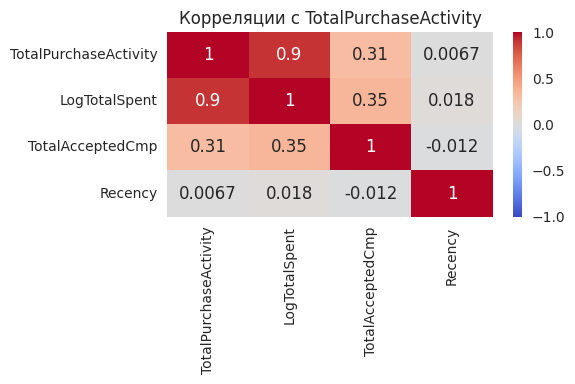

In [223]:
# –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
features_to_check = ['TotalPurchaseActivity', 'LogTotalSpent', 'TotalAcceptedCmp', 'Recency']

# –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
corr_matrix = data[features_to_check].corr()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å TotalPurchaseActivity')
plt.tight_layout()
plt.show()

–ú–µ–∂–¥—É TotalPurchaseActivity  –∏ LogTotalSpent  –µ—Å—Ç—å –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. TotalPurchaseActivity –≤ –º–æ–¥–µ–ª–∏ –≤–µ–¥—ë—Ç —Å–µ–±—è –∫–∞–∫ –≤—Ç–æ—Ä–∏—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –≤–∫–ª–∞–¥ –¥–∞—ë—Ç LogTotalSpent, —Å –∫–æ—Ç–æ—Ä—ã–º –æ–Ω–∞ –Ω–∞ 90% —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–∞. –≠—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç, –ø–æ—á–µ–º—É SHAP-–≥—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∏–∑–∫—É—é –≤–∞–∂–Ω–æ—Å—Ç—å TotalPurchaseActivity: –º–æ–¥–µ–ª—å —É–∂–µ "—É—á–∏—Ç—ã–≤–∞–µ—Ç" —ç—Ç—É –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é —á–µ—Ä–µ–∑ LogTotalSpent. –î–∞–Ω–Ω–æ–µ —è–≤–ª–µ–Ω–∏–µ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å—é                           

# EDA

## Response

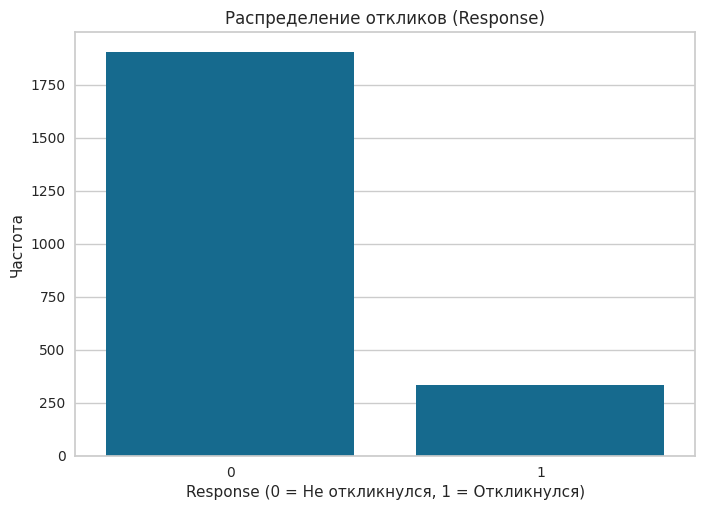

In [224]:
# –°—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π Response
sns.countplot(x='Response', data=data)

# –ù–∞—Å—Ç—Ä–æ–∏–º –∑–∞–≥–æ–ª–æ–≤–æ–∫ –∏ –ø–æ–¥–ø–∏—Å–∏
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∫–ª–∏–∫–æ–≤ (Response)')
plt.xlabel('Response (0 = –ù–µ –æ—Ç–∫–ª–∏–∫–Ω—É–ª—Å—è, 1 = –û—Ç–∫–ª–∏–∫–Ω—É–ª—Å—è)')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.show()

In [225]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  \
0            0                     22                 0                1   
1            0                      4                 0                1   

   LogTotalSpent  LogTotalSpentRounded  
0 7.388946097618                   7.4  
1 3.332204510175                   3.3

## HasChildren

In [226]:
# –î–æ–ª—è –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è(Response=1) –ø–æ —Ñ–∏—á–µ HasChildren
response_by_children = data.groupby('HasChildren')['Response'].mean().reset_index()
print(response_by_children)

   HasChildren       Response
0            0 0.265306122449
1            1       0.103125


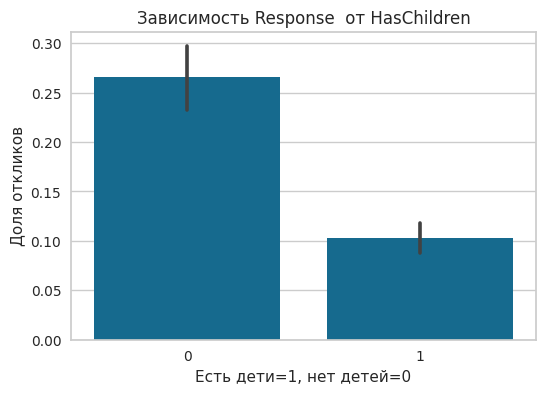

In [227]:
plt.figure(figsize=(6,4))
sns.barplot(x='HasChildren', y='Response', data=data)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å Response  –æ—Ç HasChildren')
#plt.rcParams['font.family'] = 'DejaVu Sans'
plt.xlabel('–ï—Å—Ç—å –¥–µ—Ç–∏=1, –Ω–µ—Ç –¥–µ—Ç–µ–π=0')
plt.ylabel('–î–æ–ª—è –æ—Ç–∫–ª–∏–∫–æ–≤')
plt.show()

HasChildren(0) - –æ—Ç–∫–ª–∏–∫—É–Ω—É–ª–æ—Å—å 26.5%
HasChildren(1) - –æ—Ç–∫–ª–∏–∫–Ω—É–ª–æ—Å—å 10.3%
–õ—é–¥–∏ –±–µ–∑ –¥–µ—Ç–µ–π –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –Ω–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —á–∞—â–µ, —á–µ–º —Ç–µ, —É –∫–æ–≥–æ –µ—Å—Ç—å –¥–µ—Ç–∏.

## Recency 

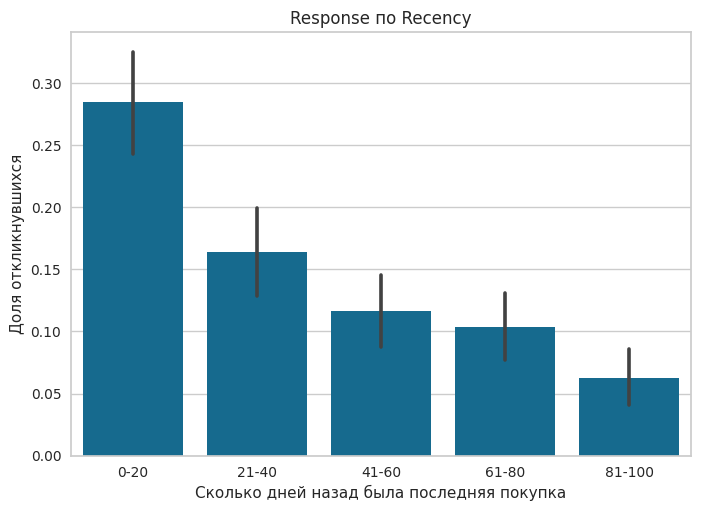

In [228]:
# Recency
data['RecencyGroup'] = pd.cut(data['Recency'], bins=[-1, 20, 40, 60, 80, 100], labels=['0-20','21-40','41-60','61-80','81-100'])
sns.barplot(data=data, x='RecencyGroup', y='Response')
plt.title('Response –ø–æ Recency')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.xlabel('–°–∫–æ–ª—å–∫–æ –¥–Ω–µ–π –Ω–∞–∑–∞–¥ –±—ã–ª–∞ –ø–æ—Å–ª–µ–¥–Ω—è—è –ø–æ–∫—É–ø–∫–∞')
plt.ylabel('–î–æ–ª—è –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è')
plt.show()

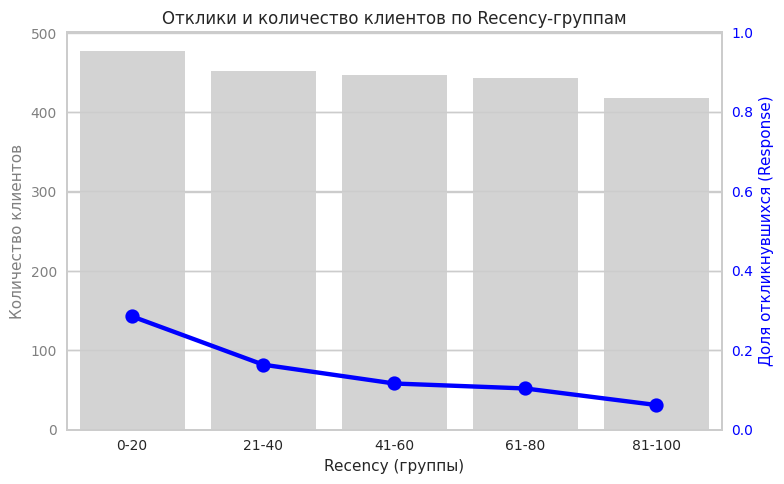

In [229]:
# –ü–æ–¥—Å—á—ë—Ç –¥–æ–ª–∏ –æ—Ç–∫–ª–∏–∫–æ–≤ –ø–æ –≥—Ä—É–ø–ø–∞–º Recency
response_rate = data.groupby('RecencyGroup')['Response'].mean()
counts = data['RecencyGroup'].value_counts().sort_index()

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å –¥–≤—É–º—è –æ—Å—è–º–∏
fig, ax1 = plt.subplots(figsize=(8, 5))

# –õ–µ–≤–∞—è –æ—Å—å Y ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ (–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞)
sns.barplot(x=counts.index, y=counts.values, ax=ax1, color='lightgray')
ax1.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤', color='gray')
ax1.set_xlabel('Recency (–≥—Ä—É–ø–ø—ã)')
ax1.tick_params(axis='y', labelcolor='gray')

# –ü—Ä–∞–≤–∞—è –æ—Å—å Y ‚Äî –¥–æ–ª—è –æ—Ç–∫–ª–∏–∫–æ–≤ (–ª–∏–Ω–µ–π–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫)
ax2 = ax1.twinx()
sns.pointplot(x=response_rate.index, y=response_rate.values, ax=ax2, color='blue', markers='o', linestyles='-')
ax2.set_ylabel('–î–æ–ª—è –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è (Response)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, 1)

# –ó–∞–≥–æ–ª–æ–≤–æ–∫
plt.title('–û—Ç–∫–ª–∏–∫–∏ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ Recency-–≥—Ä—É–ø–ø–∞–º')
plt.tight_layout()
plt.show()

–ê–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ Recency –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ, —á—Ç–æ –∏—Å–∫–ª—é—á–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ü—Ä–∏ —ç—Ç–æ–º —á—ë—Ç–∫–æ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å - —á–µ–º –¥–æ–ª—å—à–µ –∫–ª–∏–µ–Ω—Ç –Ω–µ —Å–æ–≤–µ—Ä—à–∞–ª –ø–æ–∫—É–ø–∫—É, —Ç–µ–º –Ω–∏–∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –µ–≥–æ –æ—Ç–∫–ª–∏–∫–∞ –Ω–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–∞–º–ø–∞–Ω–∏–∏. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Å–≤–µ–∂–∞—è –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å ‚Äî –∫–ª—é—á–µ–≤–æ–π —Ñ–∞–∫—Ç–æ—Ä –≤–æ–≤–ª–µ—á—ë–Ω–Ω–æ—Å—Ç–∏. –ù–∞–∏–±–æ–ª–µ–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –∫–ª–∏–µ–Ω—Ç—ã, —Å–æ–≤–µ—Ä—à–∏–≤—à–∏–µ –ø–æ–∫—É–ø–∫—É –≤ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 20 –¥–Ω–µ–π.

In [230]:
# data.drop(['RecencyGroup'], axis=1, inplace=True)

## MaritalFlag

In [231]:
# –í—ã—á–∏—Å–ª–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
correlation_m_r = data['MaritalFlag'].corr(data['Response'])

print(f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É MaritalFlag –∏ Response: {correlation_m_r}')

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É MaritalFlag –∏ Response: -0.15059867663155668


In [232]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ MaritalFlag –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Response
response_by_marital = data.groupby('MaritalFlag')['Response'].mean().reset_index()

print(response_by_marital)

   MaritalFlag       Response
0            0 0.221662468514
1            1 0.109494109494


In [233]:
marital_distribution = data['MaritalFlag'].value_counts(normalize=True).reset_index()
marital_distribution.columns = ['MaritalFlag', 'Proportion']

print(marital_distribution)

   MaritalFlag     Proportion
0            1 0.645060348681
1            0 0.354939651319


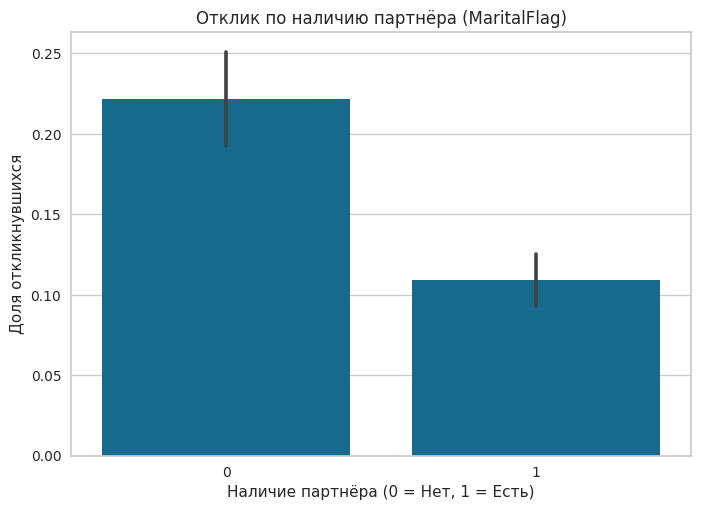

In [234]:
#–ì—Ä–∞—Ñ–∏–∫ –æ—Ç–∫–ª–∏–∫–æ–≤ –ø–æ MaritalFlag
sns.barplot(x='MaritalFlag', y='Response', data=data)

plt.title('–û—Ç–∫–ª–∏–∫ –ø–æ –Ω–∞–ª–∏—á–∏—é –ø–∞—Ä—Ç–Ω—ë—Ä–∞ (MaritalFlag)')
plt.xlabel('–ù–∞–ª–∏—á–∏–µ –ø–∞—Ä—Ç–Ω—ë—Ä–∞ (0 = –ù–µ—Ç, 1 = –ï—Å—Ç—å)')
plt.ylabel('–î–æ–ª—è –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è')

plt.show()

## Income

In [235]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–æ–º –∏ –æ—Ç–∫–ª–∏–∫–∞–º–∏
correlation_i_r = data['Income'].corr(data['Response'])
print(f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É Income –∏ Response: {correlation_i_r}')

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É Income –∏ Response: 0.13301550448512658


In [236]:
# –ò—â—É –≤—ã–±—Ä–æ—Å—ã
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: {len(outliers)}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: 8


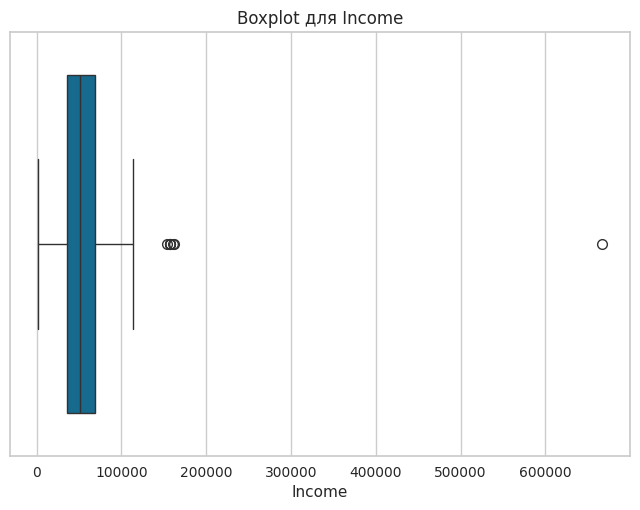

In [237]:
sns.boxplot(x=data['Income'])
plt.title('Boxplot –¥–ª—è Income')
plt.show()

In [238]:
print(data['Income'].describe())

count                 2237
mean    52232.033303531513
std     25044.375877751736
min                   1730
25%                  35523
50%                  51479
75%                  68281
max                 666666
Name: Income, dtype: float64


In [239]:
# –£–¥–∞–ª—è—é –≤—ã–±—Ä–æ—Å—ã
data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

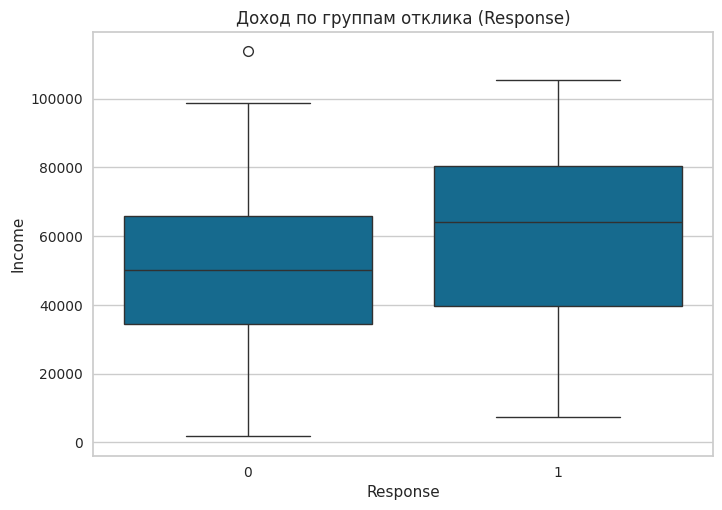

In [240]:
sns.boxplot(x='Response', y='Income', data=data)
plt.title('–î–æ—Ö–æ–¥ –ø–æ –≥—Ä—É–ø–ø–∞–º –æ—Ç–∫–ª–∏–∫–∞ (Response)')
plt.show()

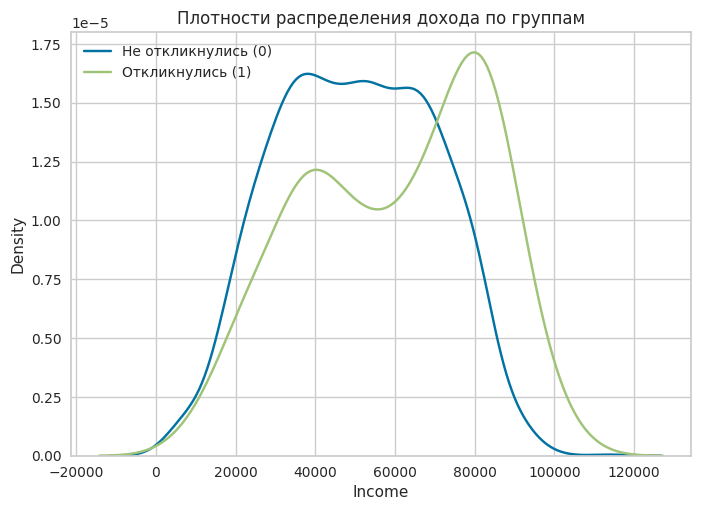

In [241]:
sns.kdeplot(data[data['Response'] == 0]['Income'], label='–ù–µ –æ—Ç–∫–ª–∏–∫–Ω—É–ª–∏—Å—å (0)')
sns.kdeplot(data[data['Response'] == 1]['Income'], label='–û—Ç–∫–ª–∏–∫–Ω—É–ª–∏—Å—å (1)')
plt.title('–ü–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–æ—Ö–æ–¥–∞ –ø–æ –≥—Ä—É–ø–ø–∞–º')
plt.legend()
plt.show()

In [242]:
# –†–∞–∑–±–∏–≤–∞—é –¥–æ—Ö–æ–¥ –Ω–∞ –≥—Ä—É–ø–ø—ã
data['IncomeGroup'] = pd.qcut(data['Income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
pd.crosstab(data['IncomeGroup'], data['Response'], normalize='index')

Response                 0              1
IncomeGroup                              
Low          0.89605734767  0.10394265233
Mid-Low     0.874326750449 0.125673249551
Mid-High    0.901433691756 0.098566308244
High        0.728417266187 0.271582733813

In [243]:
_, bins = pd.qcut(data['Income'], q=4, retbins=True)
print(bins)

[  1730.  35416.  51373.  68118. 113734.]


In [244]:
print(f"High income –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å: {bins[3]:,.0f}")

High income –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å: 68,118


In [245]:
# C–æ–∑–¥–∞—é –±–∏–Ω–∞—Ä–Ω—É—é —Ñ–∏—á—É HightIncome
data['HighIncome'] = (data['Income'] >= 68118).astype(int)

In [246]:
data['HighIncome'].value_counts(normalize=True)

HighIncome
0   0.749663526245
1   0.250336473755
Name: proportion, dtype: float64

In [247]:
response_by_income = pd.crosstab(data['HighIncome'], data['Response'], normalize='index')
print(response_by_income)

Response                0              1
HighIncome                              
0          0.890484739677 0.109515260323
1          0.729390681004 0.270609318996


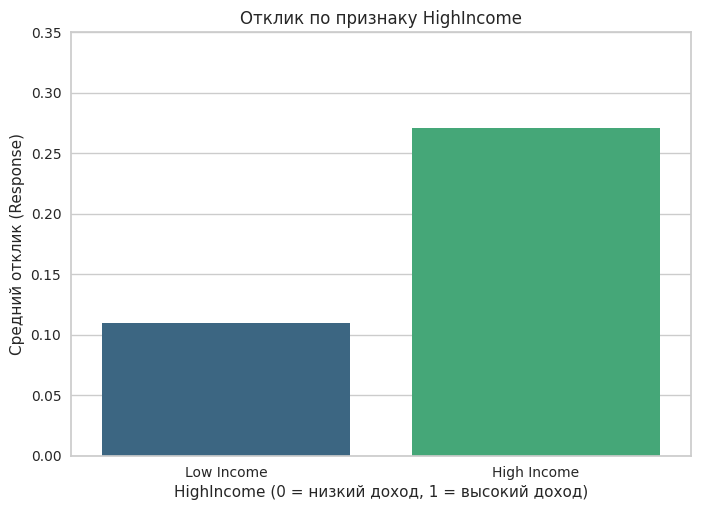

In [248]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
response_by_income = data.groupby('HighIncome')['Response'].mean().reset_index()

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
sns.barplot(x='HighIncome', y='Response', data=response_by_income, palette='viridis')

# –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
plt.title('–û—Ç–∫–ª–∏–∫ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É HighIncome')
plt.xlabel('HighIncome (0 = –Ω–∏–∑–∫–∏–π –¥–æ—Ö–æ–¥, 1 = –≤—ã—Å–æ–∫–∏–π –¥–æ—Ö–æ–¥)')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫ (Response)')
plt.ylim(0, 0.35)  # –ß—Ç–æ–±—ã –ª—É—á—à–µ –≤–∏–¥–µ—Ç—å —Ä–∞–∑–Ω–∏—Ü—É
plt.xticks([0, 1], ['Low Income', 'High Income'])

plt.show()

–í—ã—Å–æ–∫–∏–π –¥–æ—Ö–æ–¥ ‚Üí –≤—ã—à–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–ª–∏–∫–∞
27.2% –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è —Å—Ä–µ–¥–∏ –≥—Ä—É–ø–ø—ã —Å —Å–∞–º—ã–º –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º ‚Äî —ç—Ç–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ, —á–µ–º —É –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –≥—Ä—É–ø–ø.
IncomeGroup ‚Äî —Å–∏–ª—å–Ω—ã–π –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä
–ï—Å–ª–∏ Income >= 68 118 —à–∞–Ω—Å—ã –æ—Ç–∫–ª–∏–∫–∞ –≤—ã—Ä–∞—Å—Ç–∞—é—Ç
–í—ã—Å–æ–∫–∏–π –¥–æ—Ö–æ–¥ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–ª–∏–∫–∞ –ö–ª–∏–µ–Ω—Ç—ã —Å –¥–æ—Ö–æ–¥–æ–º –≤—ã—à–µ 68 118 –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –Ω–∞ –∫–∞–º–ø–∞–Ω–∏—é –ø–æ—á—Ç–∏ –≤ 2,5 —Ä–∞–∑–∞ —á–∞—â–µ (27.06% –ø—Ä–æ—Ç–∏–≤ 10.95%).
–û—Å–Ω–æ–≤—ã–≤–∞—è—Å—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —Å—Ç–æ–∏—Ç –≤—ã–¥–µ–ª–∏—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º –∫–∞–∫ –±–æ–ª–µ–µ –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤–Ω—É—é —Ü–µ–ª–µ–≤—É—é –∞—É–¥–∏—Ç–æ—Ä–∏—é –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–∏—Ö –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π.
–ö–ª–∏–µ–Ω—Ç—ã —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º (HighIncome = 1) –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –±–æ–ª–µ–µ —á–µ–º –≤ 2.5 —Ä–∞–∑–∞ —á–∞—â–µ, —á–µ–º –∫–ª–∏–µ–Ω—Ç—ã —Å –Ω–∏–∑–∫–∏–º –¥–æ—Ö–æ–¥–æ–º.

## TotalPurchaseActivity - –ù–ê SHAP –ì–†–ê–§–ò–ö–ï –ü–û–ö–ê–ó–ê–õ –õ–ò–ù–ï–ô–ù–£–Æ –ó–ê–í–ò–°–ò–ú–û–°–¢–¨ –û–¢  LogTotalSpent!

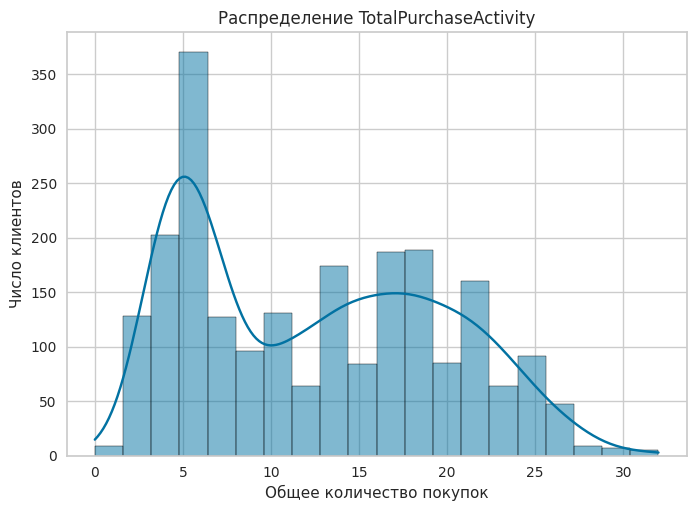

In [249]:
sns.histplot(data['TotalPurchaseActivity'], bins=20, kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ TotalPurchaseActivity")
plt.xlabel("–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–æ–∫")
plt.ylabel("–ß–∏—Å–ª–æ –∫–ª–∏–µ–Ω—Ç–æ–≤")
plt.show()

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –≥—Ä–∞—Ñ–∏–∫–∞:
- –ü–µ—Ä–≤—ã–π –ø–∏–∫ –æ–∫–æ–ª–æ 5-6 –ø–æ–∫—É–ø–æ–∫ - —ç—Ç–æ –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏
- –í—Ç–æ—Ä–æ–π –ø–∏–∫ 15-20 –ø–æ–∫—É–ø–æ–∫ - —ç—Ç–æ –∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏
- –î–ª–∏–Ω–Ω—ã–π —Ö–≤–æ—Å—Ç –≤–ø—Ä–∞–≤–æ - —ç—Ç–æ —Å—É–ø–µ—Ä –∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏

In [250]:
# # –†–∞–∑–¥–µ–ª—è—é –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ –ø–æ—Ä–æ–≥–∞–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π
def classify_activity(x):
    if x <= 6:
        return 'Low'
    elif x <= 13:
        return 'Medium'
    elif x <= 20:
        return 'High'
    else:
        return 'Super High'

data['ActivityLevel'] = data['TotalPurchaseActivity'].apply(classify_activity)

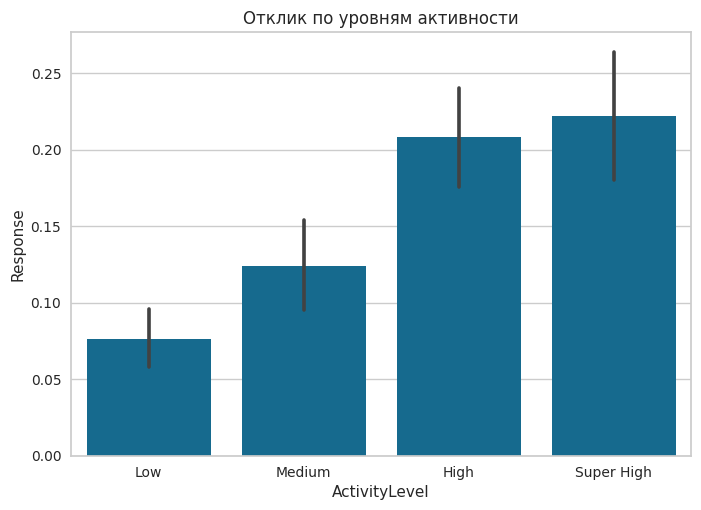

In [251]:
sns.barplot(x='ActivityLevel', y='Response', data=data, order=['Low', 'Medium', 'High', 'Super High'])
plt.title('–û—Ç–∫–ª–∏–∫ –ø–æ —É—Ä–æ–≤–Ω—è–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')
plt.show()

In [252]:
response_by_activity = data.groupby('ActivityLevel')['Response'].mean().sort_index()
print(response_by_activity)

ActivityLevel
High         0.208074534161
Low          0.076163610719
Medium       0.123732251521
Super High   0.221932114883
Name: Response, dtype: float64


In [253]:
# # –°–æ–∑–¥–∞—é –±–∏–Ω–∞—Ä–Ω—É—é —Ñ–∏—á—É HighActivity –Ω–∞ –æ—Å–Ω–æ–≤–µ ActivityLevel
data['HighActivity'] = data['ActivityLevel'].isin(['High', 'Super High']).astype(int)

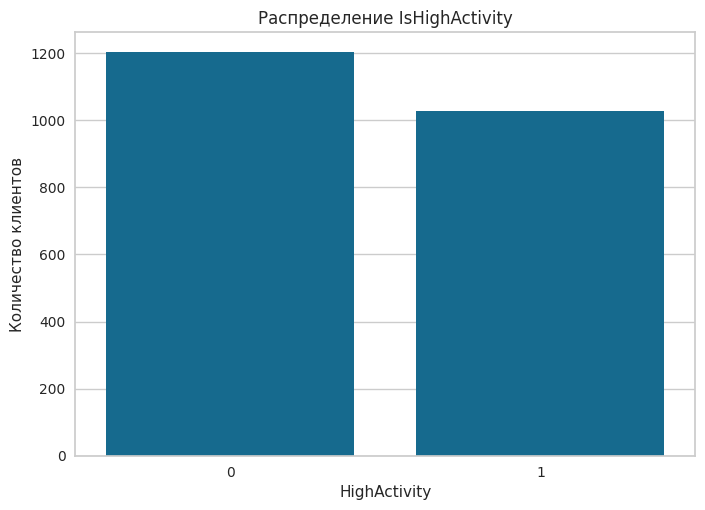

In [254]:
sns.countplot(x='HighActivity', data=data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ IsHighActivity')
plt.xlabel('HighActivity')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.show()

In [255]:
response_by_activity = data.groupby('HighActivity')['Response'].mean()
print(response_by_activity)

HighActivity
0   0.095673876872
1   0.213242453749
Name: Response, dtype: float64


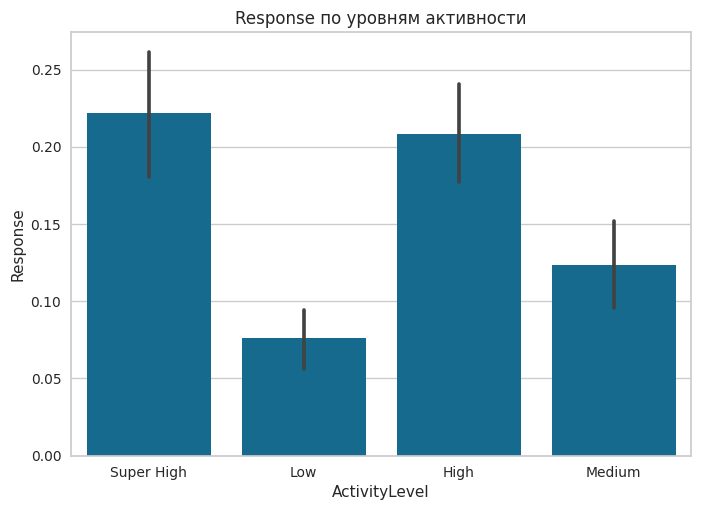

In [256]:
# # –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ —Å—É–ø–µ—Ä –∞–∫—Ç–∏–≤–Ω—ã–µ –∫–ª–∏–µ–Ω—Ç—ã —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è?
sns.barplot(data=data, x='ActivityLevel', y='Response')
plt.title("Response –ø–æ —É—Ä–æ–≤–Ω—è–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏")
plt.show()

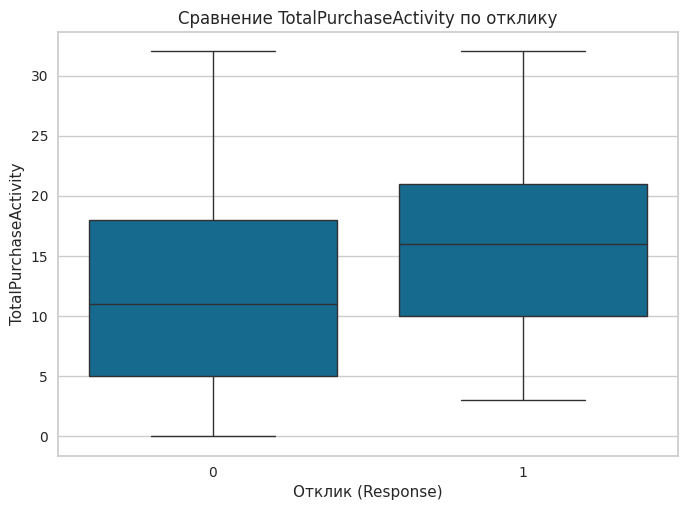

In [257]:
sns.boxplot(x='Response', y='TotalPurchaseActivity', data=data)
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ TotalPurchaseActivity –ø–æ –æ—Ç–∫–ª–∏–∫—É')
plt.xlabel('–û—Ç–∫–ª–∏–∫ (Response)')
plt.ylabel('TotalPurchaseActivity')
plt.show()

In [258]:
# C–æ–∑–¥–∞—é –±–∏–Ω–∞—Ä–Ω—ã–π —Ñ–ª–∞–≥ IsHighlyActive
data['IsHighlyActive'] = data['ActivityLevel'].isin(['High', 'Super High']).astype(int)

## TotalAcceptedCmp

In [259]:
data['TotalAcceptedCmp'].unique()

array([0, 1, 2, 3, 4])

In [260]:
data['TotalAcceptedCmp'].describe()

count             2229
mean    0.298788694482
std      0.67959709572
min                  0
25%                  0
50%                  0
75%                  0
max                  4
Name: TotalAcceptedCmp, dtype: float64

In [261]:
data.groupby(data['TotalAcceptedCmp'] > 0)['Response'].mean()

TotalAcceptedCmp
False   0.082625919638
True    0.406926406926
Name: Response, dtype: float64

In [262]:
# –°–æ–∑–¥–∞—é –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 
data['IsAcceptedBefore'] = (data['TotalAcceptedCmp'] > 0).astype(int)

In [263]:
response_total_accepted = data.groupby('Response')['TotalAcceptedCmp'].mean()
print(response_total_accepted)

Response
0   0.177308707124
1   0.988023952096
Name: TotalAcceptedCmp, dtype: float64


In [264]:
data['IsAcceptedBefore'].value_counts(normalize=True) * 100

IsAcceptedBefore
0   79.273216689098
1   20.726783310902
Name: proportion, dtype: float64

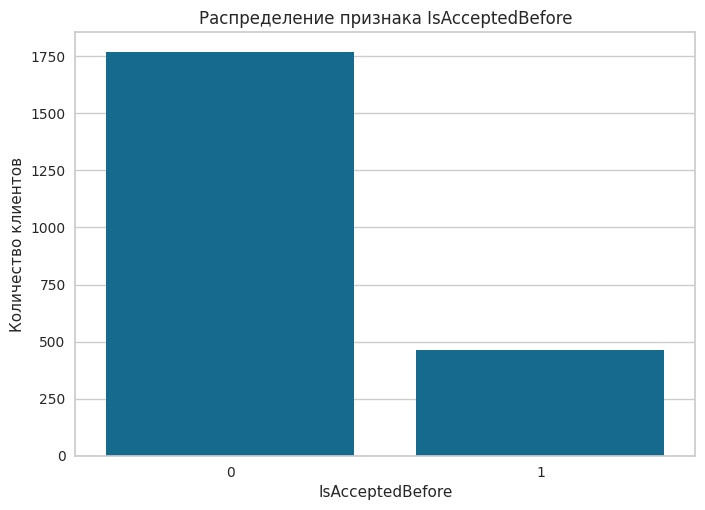

In [265]:
sns.countplot(x='IsAcceptedBefore', data=data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ IsAcceptedBefore')
plt.xlabel('IsAcceptedBefore')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.show()

## LogTotalSpentRounded- –î–õ–Ø –ü–†–û–°–ú–û–¢–†–ê –ì–†–ê–§–ò–ö–û–í –ò –ê–ù–ê–õ–ò–ó–ê. –í –û–ë–£–ß–ï–ù–ò–ï –ë–ï–†–£ –ü–†–ò–ó–ù–ê–ö LogTotalSpent

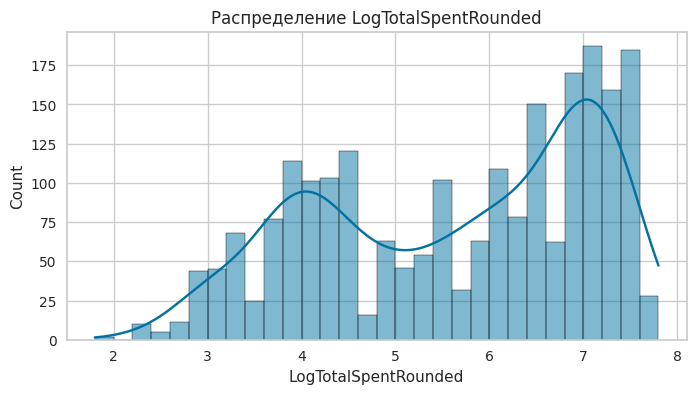

In [266]:
plt.figure(figsize=(8,4))
sns.histplot(data['LogTotalSpentRounded'], bins=30, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ LogTotalSpentRounded')
plt.xlabel('LogTotalSpentRounded')
plt.show()

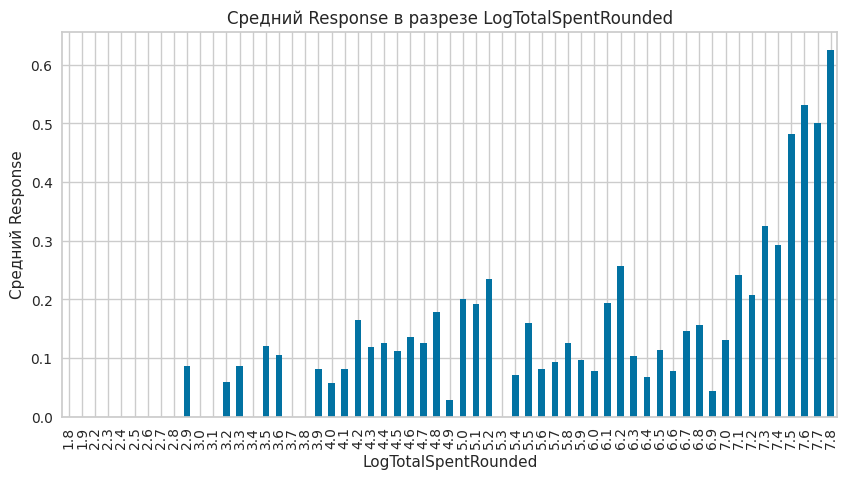

In [267]:
# # –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ–º—É –ª–æ–≥–∞—Ä–∏—Ñ–º—É –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫
response_by_logspent = data.groupby('LogTotalSpentRounded')['Response'].mean()

plt.figure(figsize=(10,5))
response_by_logspent.plot(kind='bar')
plt.title('–°—Ä–µ–¥–Ω–∏–π Response –≤ —Ä–∞–∑—Ä–µ–∑–µ LogTotalSpentRounded')
plt.xlabel('LogTotalSpentRounded')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π Response')
plt.show()

## NumWebVisitsMonth

In [268]:
data['NumWebVisitsMonth'].describe()

count             2229
mean     5.33423059668
std     2.414981498852
min                  0
25%                  3
50%                  6
75%                  7
max                 20
Name: NumWebVisitsMonth, dtype: float64

- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π –∑–∞—Ö–æ–¥—è—Ç –Ω–∞ —Å–∞–π—Ç 3-7 —Ä–∞–∑ –≤ –º–µ—Å—è—Ü.
- –ï—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã - –¥–æ 20 –ø–æ—Å–µ—â–µ–Ω–∏–π.

In [269]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–π Response
web_visits_response = data.groupby('NumWebVisitsMonth')['Response'].mean().reset_index()

# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º —Å—Ç–æ–ª–±—Ü—ã –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
web_visits_response.columns = ['NumWebVisitsMonth', 'MeanResponse']

# –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É
print(web_visits_response)

    NumWebVisitsMonth   MeanResponse
0                   0              0
1                   1 0.201342281879
2                   2  0.19801980198
3                   3 0.160975609756
4                   4 0.119815668203
5                   5 0.089285714286
6                   6 0.141592920354
7                   7 0.114503816794
8                   8 0.166666666667
9                   9 0.349397590361
10                 10 0.333333333333
11                 13              0
12                 14              0
13                 17              0
14                 19              0
15                 20              0


<Axes: xlabel='NumWebVisitsMonth'>

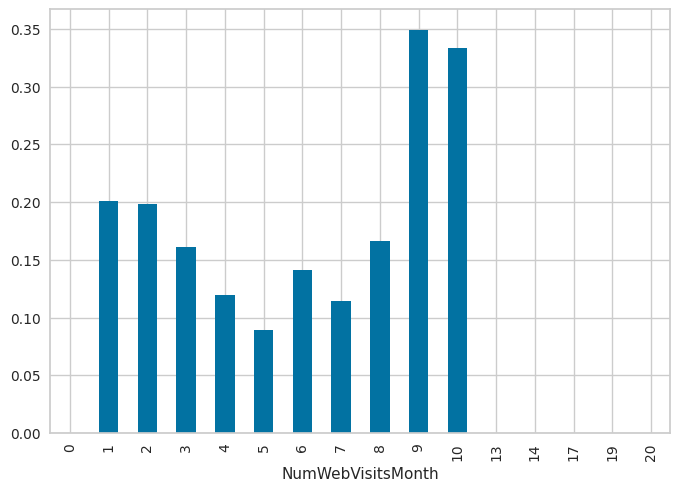

In [270]:
data.groupby('NumWebVisitsMonth')['Response'].mean().plot(kind='bar')

In [271]:
data['NumWebVisitsMonth'].max()

20

In [272]:
data[data['NumWebVisitsMonth'] == 20][['NumWebVisitsMonth', 'Response']]

NumWebVisitsMonth  Response
9                    20         0
774                  20         0
1245                 20         0

In [273]:
data['NumWebVisitsMonth'].value_counts().sort_index()

NumWebVisitsMonth
0       7
1     149
2     202
3     205
4     217
5     280
6     339
7     393
8     342
9      83
10      3
13      1
14      2
17      1
19      2
20      3
Name: count, dtype: int64

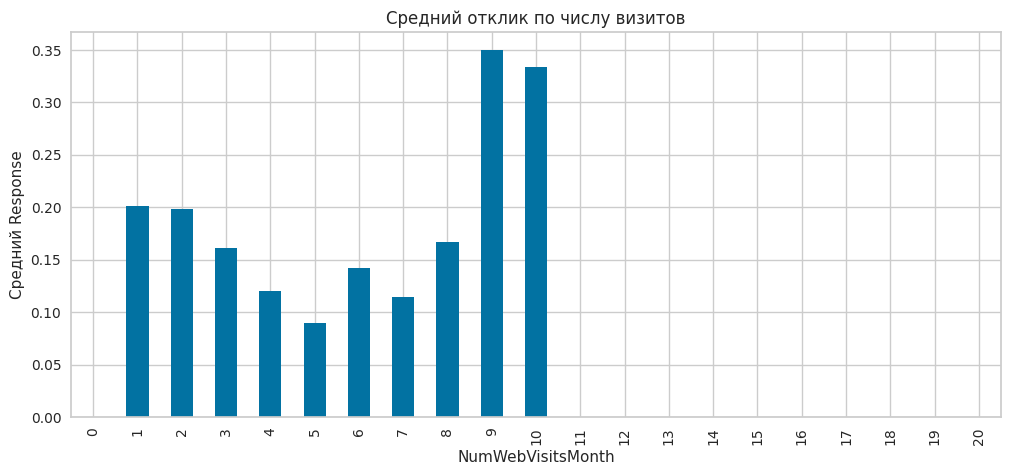

In [274]:
# –Ø–≤–Ω–∞—è –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ + –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
response_by_visits = data.groupby('NumWebVisitsMonth')['Response'].mean()

# –î–æ–±–∞–≤–∏–º –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Ç 0 –¥–æ 20)
response_by_visits = response_by_visits.reindex(range(0, 21), fill_value=0)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
response_by_visits.plot(kind='bar', figsize=(12, 5), title='–°—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫ –ø–æ —á–∏—Å–ª—É –≤–∏–∑–∏—Ç–æ–≤')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π Response')
plt.show()

In [275]:
# C–æ–∑–¥–∞—é –±–∏–Ω—ã –ø–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –Ω–∞ —Å–∞–π—Ç–µ
def web_visit_segment(x):
    if x == 0:
        return 'No Visits'
    elif x <= 2:
        return 'Effective'
    elif x <= 7:
        return 'Passive'
    elif x <= 10:
        return 'High Traffic'
    else:
        return 'Anomaly'

In [276]:
data['WebVisitSegment'] = data['NumWebVisitsMonth'].apply(web_visit_segment)

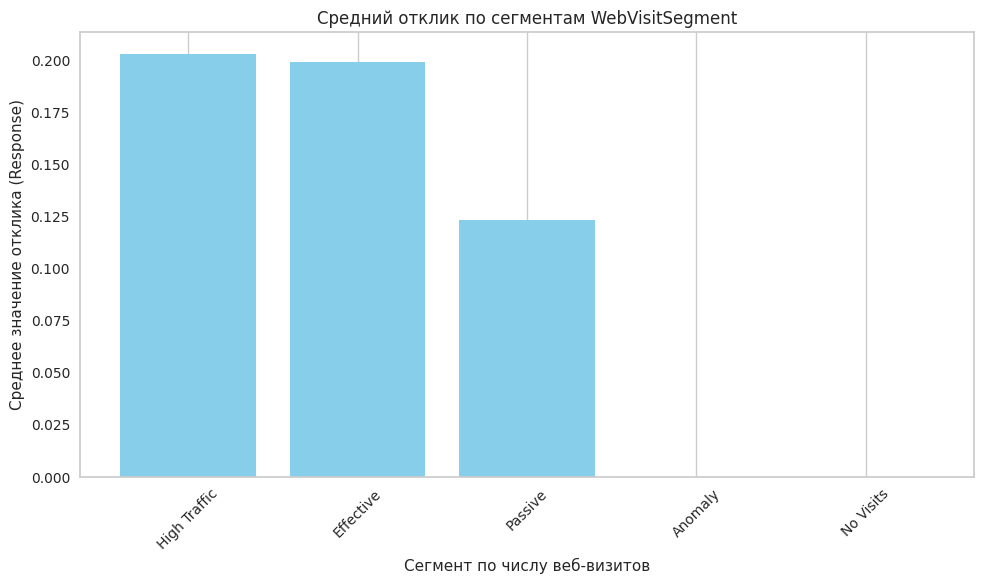

WebVisitSegment  Response
2    High Traffic     0.203
1       Effective     0.199
4         Passive     0.123
0         Anomaly         0
3       No Visits         0

In [277]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫
segment_response = data.groupby('WebVisitSegment')['Response'].mean().reset_index().sort_values(by='Response', ascending=False)

# –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(10, 6))
plt.bar(segment_response['WebVisitSegment'], segment_response['Response'], color='skyblue')
plt.title('–°—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º WebVisitSegment')
plt.ylabel('–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ç–∫–ª–∏–∫–∞ (Response)')
plt.xlabel('–°–µ–≥–º–µ–Ω—Ç –ø–æ —á–∏—Å–ª—É –≤–µ–±-–≤–∏–∑–∏—Ç–æ–≤')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# –ü–æ–∫–∞–∂–µ–º —Ç–∞–±–ª–∏—Ü—É —Ç–æ–∂–µ
segment_response.round(3)

In [278]:
data['HightWebVisitor'] = data['WebVisitSegment'].isin(['High Traffic', 'Effective']).astype(int)

In [279]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  ...  \
0            0                     22                 0                1  ...   
1            0                      4                 0                1  ...   

   LogTotalSpentRounded  RecencyGroup IncomeGroup HighIncome  ActivityLevel  \
0                   7.4         41-60    Mid-High          0     Super High   
1                   3.3         21-40     Mid-Low          0            Low   

  HighActivity  IsHighlyActive  IsAcceptedBefore  WebVisitSegment  \
0            1               1                 0          Passive   
1            0               0                 0          Passive   

  HightWebVisitor  
0               0  
1               0  

[2 rows x 21 columns]

## HigherEducation-–º–∞–ª–æ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –º–æ–¥–µ–ª–∏

In [280]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
data['HigherEducation'].value_counts(normalize=True)

HigherEducation
1   0.885598923284
0   0.114401076716
Name: proportion, dtype: float64

In [281]:
data.groupby('HigherEducation')['Response'].mean()

HigherEducation
0   0.094117647059
1    0.15704154002
Name: Response, dtype: float64

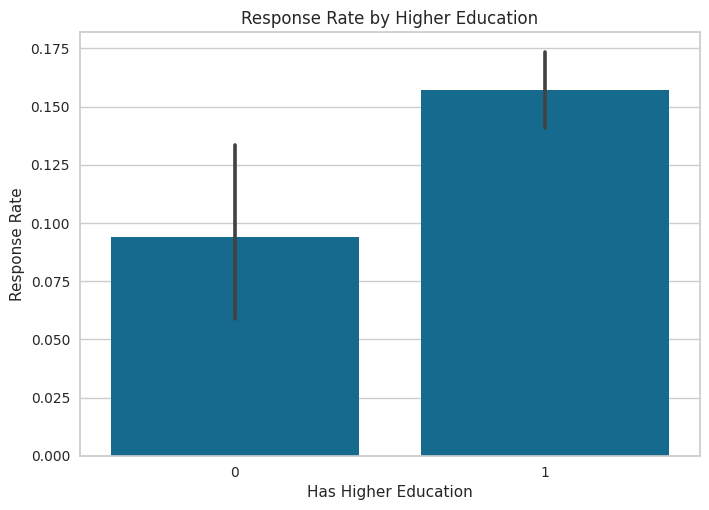

In [282]:
sns.barplot(x='HigherEducation', y='Response', data=data)
plt.xlabel('Has Higher Education')
plt.ylabel('Response Rate')
plt.title('Response Rate by Higher Education')
plt.show()

In [283]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  ...  \
0            0                     22                 0                1  ...   
1            0                      4                 0                1  ...   

   LogTotalSpentRounded  RecencyGroup IncomeGroup HighIncome  ActivityLevel  \
0                   7.4         41-60    Mid-High          0     Super High   
1                   3.3         21-40     Mid-Low          0            Low   

  HighActivity  IsHighlyActive  IsAcceptedBefore  WebVisitSegment  \
0            1               1                 0          Passive   
1            0               0                 0          Passive   

  HightWebVisitor  
0               0  
1               0  

[2 rows x 21 columns]

In [284]:
features_2 = ['Recency', 'Age', 'HasChildren', 'MaritalFlag', 'HigherEducation', 'LogTotalSpent', 'HighIncome', 'IsAcceptedBefore', 'HightWebVisitor']

X = data[features_2]
y = data['Response']

In [285]:
def fit_catboost_model(X, y, features=None):
    X_filtered = X[features] if features else X

    # –†–∞—Å—á–µ—Ç –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–∏–º–µ—Ä —Å –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π)
    class_counts = y.value_counts()
    total = len(y)
    class_weights = [total / class_counts[cls] for cls in sorted(class_counts.index)]

    model = CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.1,
        verbose=False,
        class_weights=class_weights
    )

    model.fit(X_filtered, y)

    feature_importance = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X_filtered.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    y_pred = model.predict(X_filtered)

    display(feature_importance_df)

    return model

In [286]:
_ = fit_catboost_model(X, y)

Feature      Importance
5     LogTotalSpent 27.974034890918
0           Recency 23.665036384265
1               Age 18.729704525638
7  IsAcceptedBefore  9.367451598767
3       MaritalFlag  6.436357520715
8   HightWebVisitor  6.206009777353
2       HasChildren  4.385024866314
6        HighIncome   1.85829297217
4   HigherEducation  1.378087463861

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:07<00:00,  1.29it/s]


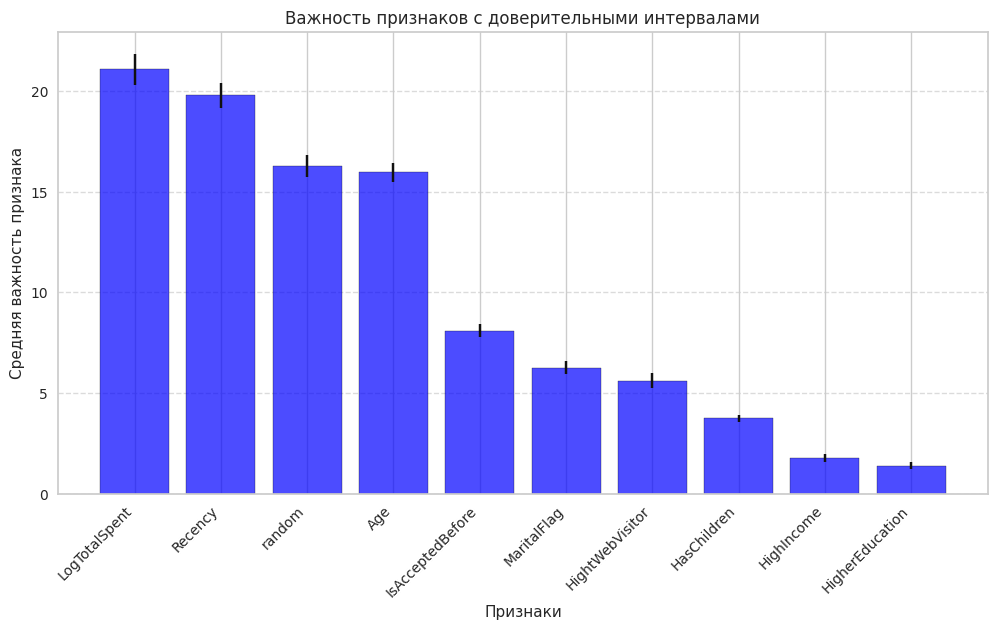

In [287]:
n_iterations = 10
features = list(X.columns) + ['random']

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_records = {feature: [] for feature in features}

# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ –º–Ω–æ–≥–æ —Ä–∞–∑
for _ in tqdm(range(n_iterations)):
    X['random'] = np.random.random(size=len(X))
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
    model.fit(X, y)

    # –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    feature_importance = model.feature_importances_

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å–ª–æ–≤–∞—Ä—å
    for feature, importance in zip(X.columns, feature_importance):
        feature_importance_records[feature].append(importance)

# –°–æ–∑–¥–∞—ë–º DataFrame —Å –∏—Ç–æ–≥–æ–≤—ã–º–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏
feature_importance_stats = pd.DataFrame({
    'feature': list(feature_importance_records.keys()),
    'mean': [np.mean(values) for values in feature_importance_records.values()],
    'std': [np.std(values) for values in feature_importance_records.values()]
}).sort_values(by='mean', ascending=False)

# display(feature_importance_stats)

plt.figure(figsize=(12, 6))
plt.bar(
    feature_importance_stats['feature'], 
    feature_importance_stats['mean'], 
    yerr=feature_importance_stats['std'], 
    capsize=5, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)

plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

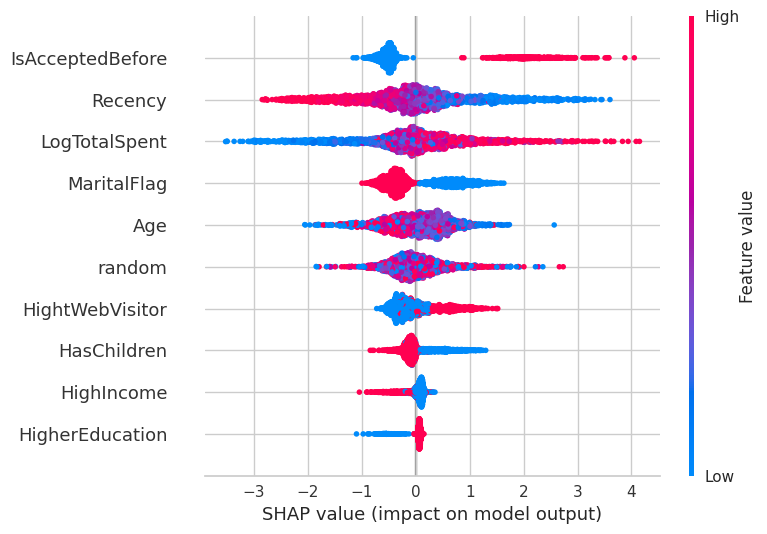

In [288]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
model.fit(X, y)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

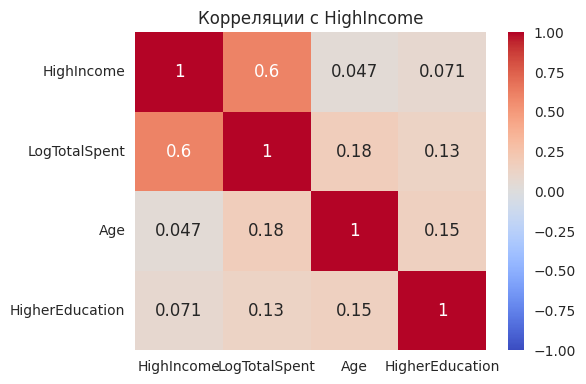

In [289]:
# –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
features_to_check_2 = ['HighIncome', 'LogTotalSpent', 'Age', 'HigherEducation']

# –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
corr_matrix = data[features_to_check_2].corr()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å HighIncome')
plt.tight_layout()
plt.show()

In [290]:
print(corr_matrix)

                    HighIncome  LogTotalSpent            Age  HigherEducation
HighIncome                   1 0.604046708297 0.046708490029   0.071044457708
LogTotalSpent   0.604046708297              1 0.175344842612   0.129280352603
Age             0.046708490029 0.175344842612              1   0.149844998356
HigherEducation 0.071044457708 0.129280352603 0.149844998356                1


HighIncome –∏ LogTotalSpent - c–∞–º–∞—è —Å–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤ —Ç–∞–±–ª–∏—Ü–µ. –õ—é–¥–∏ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, —Ç—Ä–∞—Ç—è—Ç –±–æ–ª—å—à–µ –¥–µ–Ω–µ–≥ ‚Äî –ª–æ–≥–∏—á–Ω–æ

## Age - –ø–æ–¥ –≤–æ–ø—Ä–æ—Å–æ–º, –Ω—É–∂–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Å –¥—Ä—É–≥–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

In [291]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∑–∞—Ü–∏–∏ –≤–æ–∑—Ä–≤—Å—Ç–∞
def age_segment(age):
    if 20 <= age <= 39:
        return 'Young'
    elif 40 <= age <= 59:
        return 'Middle-aged'
    elif 60 <= age <= 86:
        return 'Old'

In [292]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫ —Å—Ç–æ–ª–±—Ü—É Age
data['AgeSegment'] = data['Age'].apply(age_segment)

In [293]:
print(data['AgeSegment'].value_counts())

AgeSegment
Middle-aged    1184
Old             856
Young           189
Name: count, dtype: int64


In [294]:
print(data.groupby('AgeSegment')['Response'].mean())

AgeSegment
Middle-aged   0.154560810811
Old           0.139018691589
Young         0.169312169312
Name: Response, dtype: float64


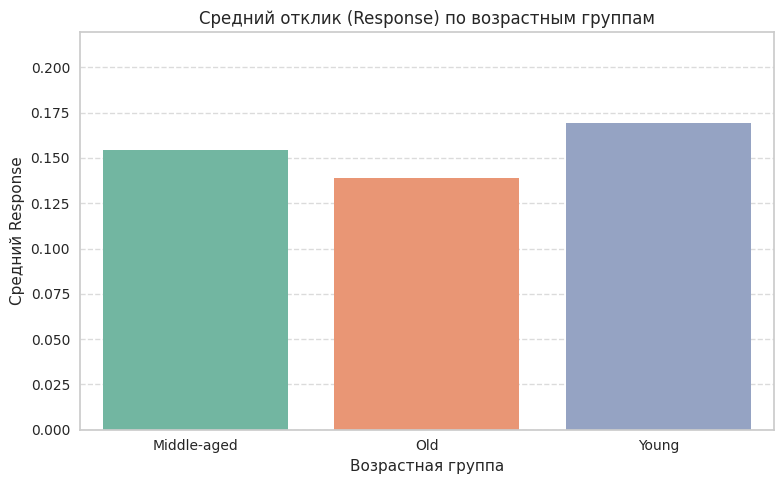

In [295]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
age_response = data.groupby('AgeSegment')['Response'].mean().reset_index()

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(8, 5))
sns.barplot(data=age_response, x='AgeSegment', y='Response', palette='Set2')
plt.title('–°—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫ (Response) –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π Response')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞')
plt.ylim(0, age_response['Response'].max() + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [296]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  ...  \
0            0                     22                 0                1  ...   
1            0                      4                 0                1  ...   

   RecencyGroup  IncomeGroup HighIncome ActivityLevel  HighActivity  \
0         41-60     Mid-High          0    Super High             1   
1         21-40      Mid-Low          0           Low             0   

  IsHighlyActive  IsAcceptedBefore  WebVisitSegment  HightWebVisitor  \
0              1                 0          Passive                0   
1              0                 0          Passive                0   

  AgeSegment  
0        Old  
1        Old  

[2 rows x 22 columns]

## –í–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ c Age

### Age –∏ HighIncome

In [297]:
# –ì—Ä—É–ø–ø–∏—Ä—É—é –ø–æ  AgeSegment –∏ HighIncome
data.groupby(['AgeSegment', 'HighIncome'])['Response'].mean()

AgeSegment   HighIncome
Middle-aged  0            0.117395944504
             1            0.295546558704
Old          0             0.10396039604
             1                     0.224
Young        0                  0.078125
             1            0.360655737705
Name: Response, dtype: float64

–†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –ø–æ –¥–æ—Ö–æ–¥—É –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∞—è, –∑–Ω–∞—á–∏—Ç –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —ç—Ç–∏—Ö –¥–≤—É—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ.

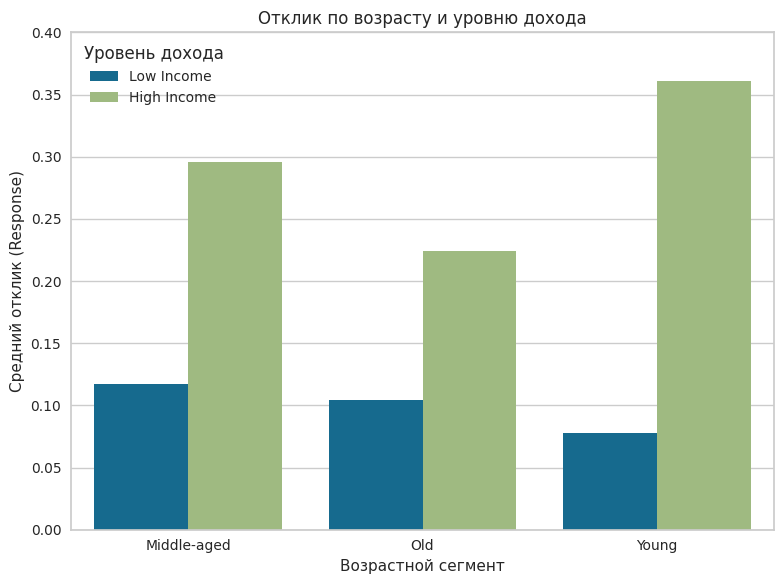

In [298]:
# –í—ã–≤–æ–∂—É –≥—Ä–∞—Ñ–∏–∫
grouped = data.groupby(['AgeSegment', 'HighIncome'])['Response'].mean().reset_index()

# –ó–∞–º–µ–Ω—è—é HighIncome –Ω–∞ —É—Ä–æ–≤–µ–Ω—å –¥–æ—Ö–æ–¥–∞
grouped['IncomeGroup'] = grouped['HighIncome'].map({0: 'Low Income', 1: 'High Income'})

plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='AgeSegment', y='Response', hue='IncomeGroup')

plt.title('–û—Ç–∫–ª–∏–∫ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É –∏ —É—Ä–æ–≤–Ω—é –¥–æ—Ö–æ–¥–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫ (Response)')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç')
plt.legend(title='–£—Ä–æ–≤–µ–Ω—å –¥–æ—Ö–æ–¥–∞')
plt.ylim(0, 0.4)
plt.tight_layout()
plt.show()

In [299]:
data['YoungHighIncome'] = ((data['AgeSegment'] == 'Young') & (data['HighIncome'] == 1)).astype(int)

In [300]:
pd.crosstab(data['YoungHighIncome'], data['Response'], normalize='index')

Response                     0              1
YoungHighIncome                              
0               0.856088560886 0.143911439114
1               0.639344262295 0.360655737705

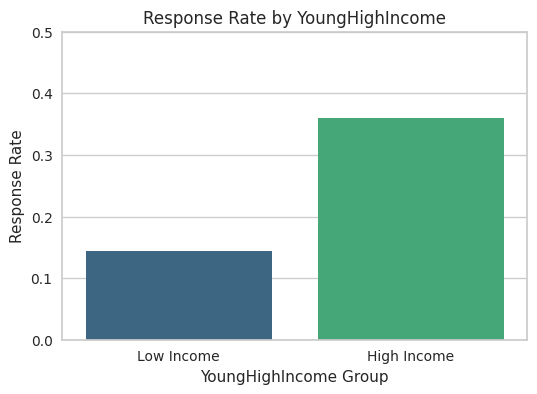

In [301]:
# –°—á–∏—Ç–∞–µ–º –¥–æ–ª—é –æ—Ç–∫–ª–∏–∫–∞ –ø–æ –≥—Ä—É–ø–ø–∞–º YoungHighIncome
response_rate = data.groupby('YoungHighIncome')['Response'].mean().reset_index()

# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã
response_rate.columns = ['YoungHighIncome', 'ResponseRate']

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(6,4))
sns.barplot(x='YoungHighIncome', y='ResponseRate', data=response_rate, palette='viridis')

plt.xticks([0,1], ['Low Income', 'High Income'])
plt.ylim(0, 0.5)
plt.title('Response Rate by YoungHighIncome')
plt.ylabel('Response Rate')
plt.xlabel('YoungHighIncome Group')
plt.show()

### AgeSegment –∏ ActivityLevel

In [302]:
data.groupby(['AgeSegment', 'ActivityLevel'])['Response'].mean()

AgeSegment   ActivityLevel
Middle-aged  High            0.221122112211
             Low             0.098901098901
             Medium          0.134920634921
             Super High      0.212643678161
Old          High            0.181506849315
             Low             0.027777777778
             Medium          0.112195121951
             Super High      0.212290502793
Young        High            0.285714285714
             Low             0.054054054054
             Medium          0.111111111111
             Super High      0.333333333333
Name: Response, dtype: float64

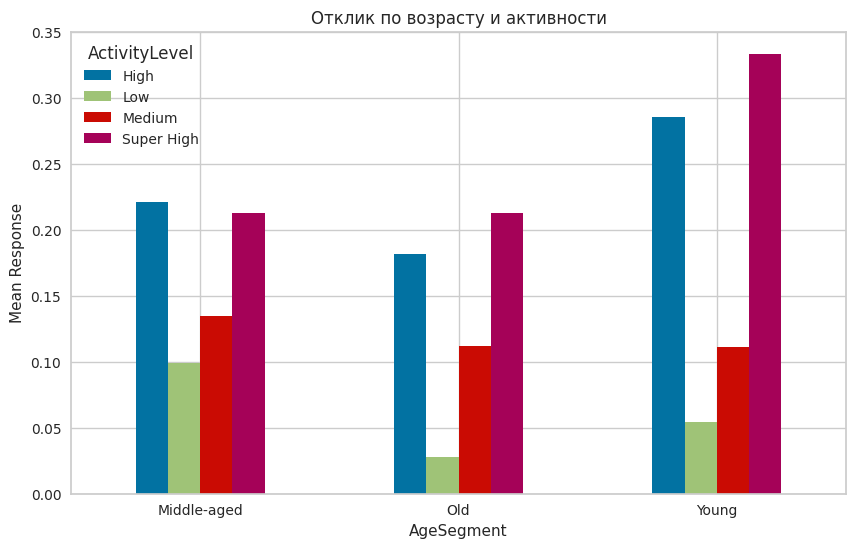

In [303]:
pivot = data.groupby(['AgeSegment', 'ActivityLevel'])['Response'].mean().unstack()
pivot.plot(kind='bar', figsize=(10, 6))
plt.title('–û—Ç–∫–ª–∏–∫ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É –∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')
plt.ylabel('Mean Response')
plt.xticks(rotation=0)
plt.legend(title='ActivityLevel')
plt.show()

In [304]:
def age_activity_segment(row):
    if row['AgeSegment'] == 'Young' and row['ActivityLevel'] in ['High', 'Super High']:
        return 'Young-Active'
    elif row['AgeSegment'] == 'Old' and row['ActivityLevel'] == 'Low':
        return 'Old-Inactive'
    else:
        return 'Other'

data['AgeActivitySegment'] = data.apply(age_activity_segment, axis=1)

In [305]:
data.groupby('AgeActivitySegment')['Response'].mean()

AgeActivitySegment
Old-Inactive   0.027777777778
Other          0.154822335025
Young-Active   0.303797468354
Name: Response, dtype: float64

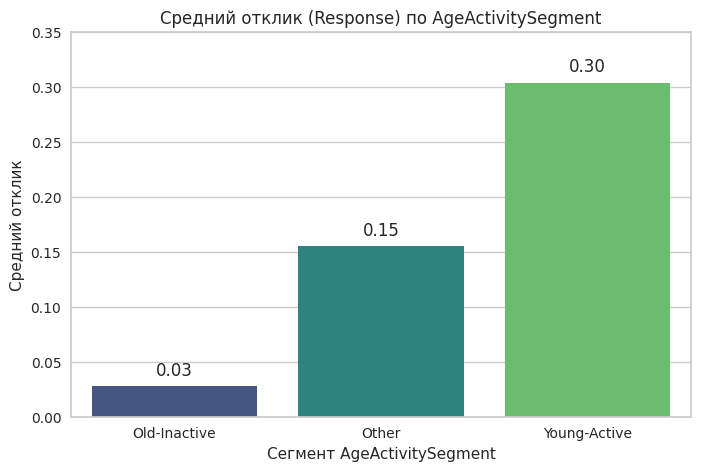

In [306]:
# –ì—Ä—É–ø–ø–∏—Ä—É—é –∏ —Å—á–∏—Ç–∞—é —Å—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫
response_by_segment = data.groupby('AgeActivitySegment')['Response'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=response_by_segment, x='AgeActivitySegment', y='Response', palette='viridis')

plt.title('–°—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫ (Response) –ø–æ AgeActivitySegment')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π –æ—Ç–∫–ª–∏–∫')
plt.xlabel('–°–µ–≥–º–µ–Ω—Ç AgeActivitySegment')
plt.ylim(0, 0.35) 

# –ü–æ–¥–ø–∏—Å—ã–≤–∞—é –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏
for index, row in response_by_segment.iterrows():
    plt.text(index, row.Response + 0.01, f"{row.Response:.2f}", ha='center')

plt.show()

In [307]:
pd.crosstab(data['AgeActivitySegment'], data['Response'], normalize='index')

Response                        0              1
AgeActivitySegment                              
Old-Inactive       0.972222222222 0.027777777778
Other              0.845177664975 0.154822335025
Young-Active       0.696202531646 0.303797468354

Young-Active ‚Äî —Å–∞–º—ã–π –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –æ—Ç–∫–ª–∏–∫–∞ (30.4%). –≠—Ç–æ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ —Å–∞–º–∞—è —Ü–µ–Ω–Ω–∞—è –≥—Ä—É–ø–ø–∞ –¥–ª—è –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞.

In [308]:
#–ü—Ä–µ–æ–±—Ä–∞–∑—É—é –≤ –±–∏–Ω–∞—Ä–Ω—ã–π –≤–∏–¥
data['IsYoungActive'] = (data['AgeActivitySegment'] == 'Young-Active').astype(int)

In [309]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  ...  \
0            0                     22                 0                1  ...   
1            0                      4                 0                1  ...   

   ActivityLevel  HighActivity IsHighlyActive IsAcceptedBefore  \
0     Super High             1              1                0   
1            Low             0              0                0   

   WebVisitSegment HightWebVisitor  AgeSegment  YoungHighIncome  \
0          Passive               0         Old                0   
1          Passive               0         Old                0   

   AgeActivitySegment IsYoungActive  
0               Other             0  
1        Old-Inactive             0  

[2 rows x 25 columns]

## Feature eng_3

In [310]:
#–°–º–æ—Ç—Ä—é feture eng –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
features_3 = ['Recency', 'HasChildren', 'MaritalFlag', 'Age', 'HigherEducation', 'LogTotalSpent',  
            'IsHighlyActive',
            'IsAcceptedBefore', 'HightWebVisitor', 'YoungHighIncome', 'IsYoungActive' ]
        
X = data[features_3]
y = data['Response']

In [311]:
def fit_catboost_model(X, y, features=None):
    X_filtered = X[features] if features else X

    # –†–∞—Å—á–µ—Ç –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–∏–º–µ—Ä —Å –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π)
    class_counts = y.value_counts()
    total = len(y)
    class_weights = [total / class_counts[cls] for cls in sorted(class_counts.index)]

    model = CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.1,
        verbose=False,
        class_weights=class_weights
    )

    model.fit(X_filtered, y)

    feature_importance = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X_filtered.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    y_pred = model.predict(X_filtered)

    display(feature_importance_df)

    return model

In [312]:
_ = fit_catboost_model(X, y)

Feature      Importance
5      LogTotalSpent 27.776256302908
0            Recency 24.069056682059
3                Age 18.910673281937
7   IsAcceptedBefore  9.390733177877
8    HightWebVisitor  6.338874806935
2        MaritalFlag  6.292697901538
1        HasChildren  4.220992453702
4    HigherEducation  1.530761112619
6     IsHighlyActive  1.233602132596
9    YoungHighIncome  0.151433549333
10     IsYoungActive  0.084918598497

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:09<00:00,  1.07it/s]


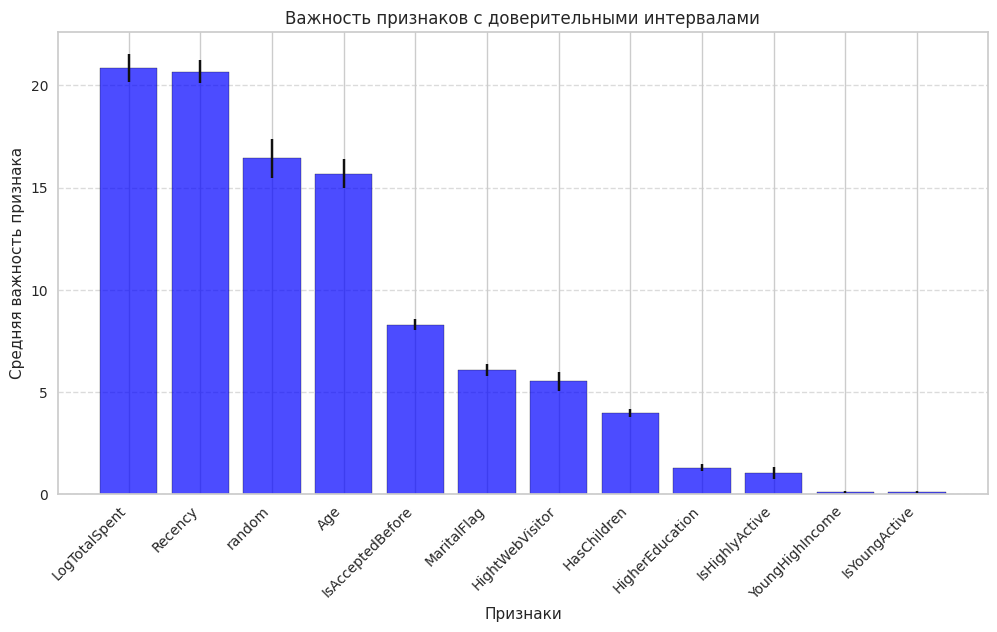

In [313]:
n_iterations = 10
features = list(X.columns) + ['random']

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_records = {feature: [] for feature in features}

# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ –º–Ω–æ–≥–æ —Ä–∞–∑
for _ in tqdm(range(n_iterations)):
    X['random'] = np.random.random(size=len(X))
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
    model.fit(X, y)

    # –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    feature_importance = model.feature_importances_

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å–ª–æ–≤–∞—Ä—å
    for feature, importance in zip(X.columns, feature_importance):
        feature_importance_records[feature].append(importance)

# –°–æ–∑–¥–∞—ë–º DataFrame —Å –∏—Ç–æ–≥–æ–≤—ã–º–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏
feature_importance_stats = pd.DataFrame({
    'feature': list(feature_importance_records.keys()),
    'mean': [np.mean(values) for values in feature_importance_records.values()],
    'std': [np.std(values) for values in feature_importance_records.values()]
}).sort_values(by='mean', ascending=False)

# display(feature_importance_stats)

plt.figure(figsize=(12, 6))
plt.bar(
    feature_importance_stats['feature'], 
    feature_importance_stats['mean'], 
    yerr=feature_importance_stats['std'], 
    capsize=5, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)

plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

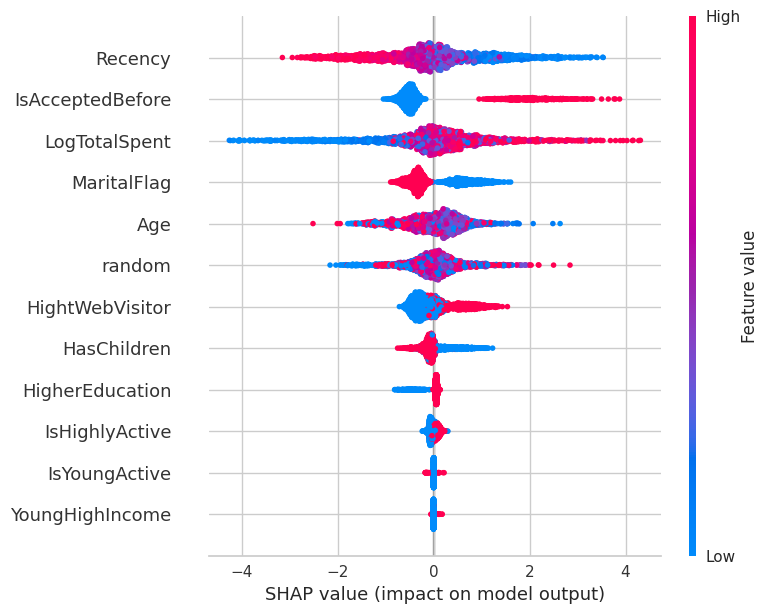

In [314]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
model.fit(X, y)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

In [315]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  ...  \
0            0                     22                 0                1  ...   
1            0                      4                 0                1  ...   

   ActivityLevel  HighActivity IsHighlyActive IsAcceptedBefore  \
0     Super High             1              1                0   
1            Low             0              0                0   

   WebVisitSegment HightWebVisitor  AgeSegment  YoungHighIncome  \
0          Passive               0         Old                0   
1          Passive               0         Old                0   

   AgeActivitySegment IsYoungActive  
0               Other             0  
1        Old-Inactive             0  

[2 rows x 25 columns]

–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º feature selection –æ—Å—Ç–∞–≤–ª—è—é –±–æ–ª–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
- IsAcceptedBefore
- Recency
- LogTotalSpent
- HighWebVisitor
- MaritalFlag
- HasChildren

## –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è

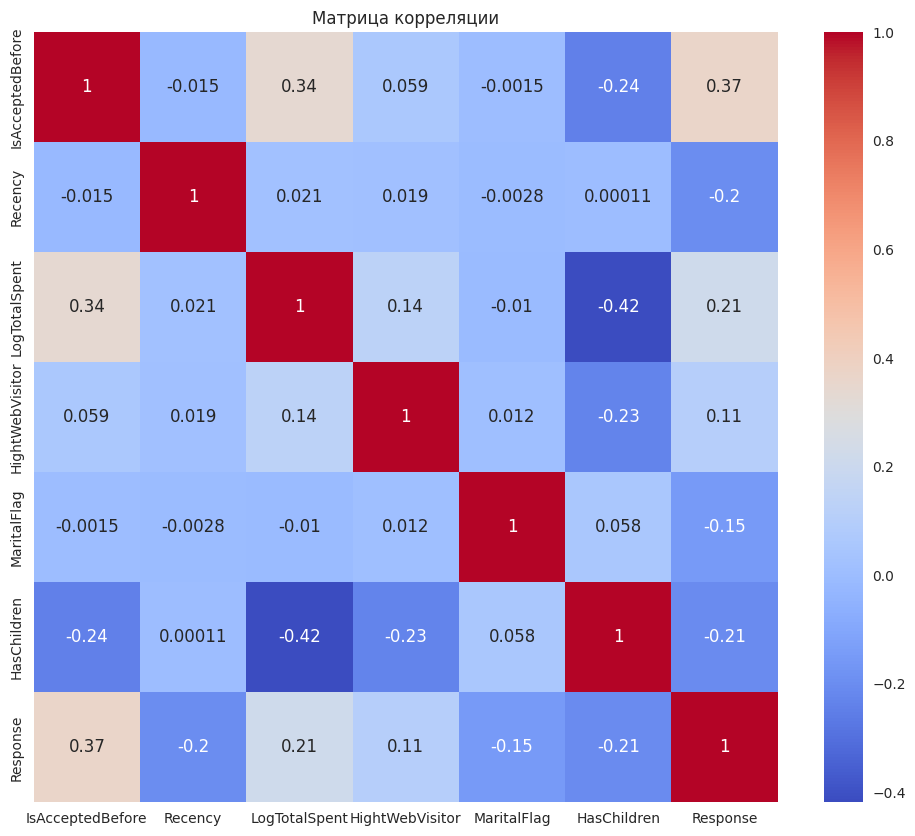

In [341]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏")
plt.show()

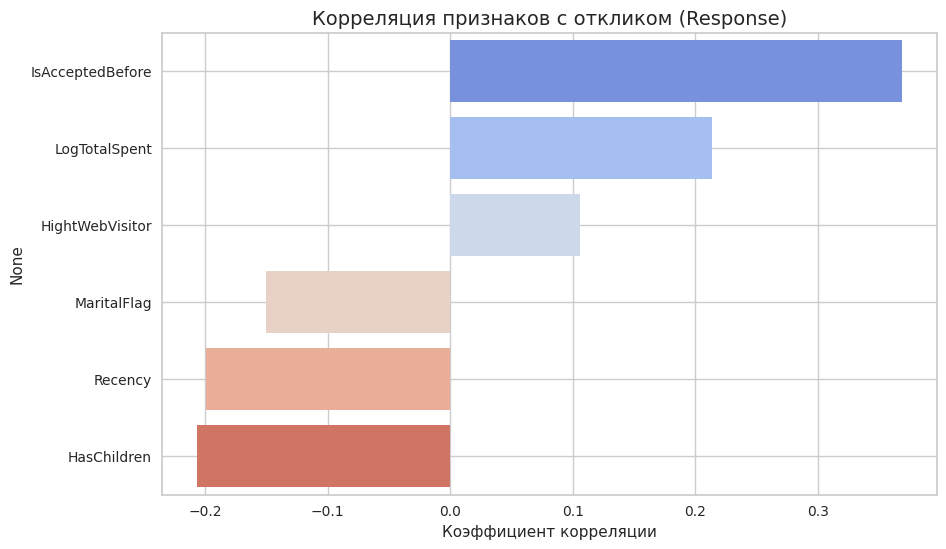

In [342]:
numeric_cols = data.select_dtypes(include='number') #–í—ã–±–∏—Ä–∞—é —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
corr_matrix = numeric_cols.corr() #–°—Ç—Ä–æ—é –º–∞—Ç—Ä–∏—Ü—É
response_corr = corr_matrix["Response"].drop("Response").sort_values(ascending=False) #–í—ã–≤–æ–∂—É —Ç–æ–ª—å–∫–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å Response
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.barplot(x=response_corr.values, y=response_corr.index, palette="coolwarm")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –æ—Ç–∫–ª–∏–∫–æ–º (Response)", fontsize=14)
plt.xlabel("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏")
plt.grid(True)
plt.show()

In [343]:
print(response_corr)

IsAcceptedBefore    0.368306194453
LogTotalSpent       0.213824081164
HightWebVisitor     0.106166167706
MaritalFlag        -0.150113905547
Recency            -0.199077577707
HasChildren        -0.206690986209
Name: Response, dtype: float64


## –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑

### IsAcceptedBefore

H‚ÇÄ: –°—Ä–µ–¥–Ω–∏–π Response –æ–¥–∏–Ω–∞–∫–æ–≤ —É —É—á–∞—Å—Ç–≤–æ–≤–∞–≤—à–∏—Ö —Ä–∞–Ω–µ–µ –∏ –Ω–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–≤—à–∏—Ö

H‚ÇÅ: –°—Ä–µ–¥–Ω–∏–π Response —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è

In [344]:
# –¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏
contingency_table = pd.crosstab(data['IsAcceptedBefore'], data['Response'])
print(contingency_table)

Response             0    1
IsAcceptedBefore           
0                 1621  146
1                  274  188


In [346]:
# Chi¬≤-—Ç–µ—Å—Ç
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {chi2:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p:.4f}")
if p < 0.05:
    print("–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ")
else:
    print("–ù–µ –æ—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ")

Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 299.8223
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0000
–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ


### Recency

H‚ÇÄ: –ù–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –¥–∞–≤–Ω–æ—Å—Ç—å—é –∫–æ–Ω—Ç–∞–∫—Ç–∞ –∏ –æ—Ç–∫–ª–∏–∫–æ–º

H‚ÇÅ: –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –µ—Å—Ç—å

In [ ]:
#–¢–µ—Å—Ç: t-test / U-test

### LogTotalSpent

H‚ÇÄ: –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è LogTotalSpent –æ–¥–∏–Ω–∞–∫–æ–≤—ã –¥–ª—è –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è –∏ –Ω–µ–æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è

H‚ÇÅ: –†–∞–∑–ª–∏—á–∞—é—Ç—Å—è

In [ ]:
#–¢–µ—Å—Ç: t-test –∏–ª–∏ U-test

###  HightWebVisitor

H‚ÇÄ: –í–µ–±-–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ Response

H‚ÇÅ: –í–ª–∏—è–µ—Ç

In [ ]:
#–¢–µ—Å—Ç: œá¬≤ –∏–ª–∏ t-test, –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö

### MaritalFlag

H‚ÇÄ: –°–µ–º–µ–π–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ –Ω–µ —Å–≤—è–∑–∞–Ω–æ —Å –æ—Ç–∫–ª–∏–∫–æ–º

H‚ÇÅ: –°–≤—è–∑–∞–Ω–æ

In [ ]:
# –¢–µ—Å—Ç: œá¬≤-–∫—Ä–∏—Ç–µ—Ä–∏–π

### HasChildren

H‚ÇÄ: –ù–∞–ª–∏—á–∏–µ –¥–µ—Ç–µ–π –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ Response

H‚ÇÅ: –í–ª–∏—è–µ—Ç

In [ ]:
#–¢–µ—Å—Ç: œá¬≤ –∏–ª–∏ t-test

### AgeSegment vs Response

H‚ÇÄ: –í–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–ª–∏–∫–∞.

H‚ÇÅ: –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è —á–∞—â–µ, —á–µ–º –¥—Ä—É–≥–∏–µ

In [273]:
# –°–æ–∑–¥–∞—ë–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–ø—Ä—è–∂—ë–Ω–Ω–æ—Å—Ç–∏
contingency_table = pd.crosstab(data['AgeSegment'], data['Response'])

# –ü—Ä–∏–º–µ–Ω—è–µ–º œá¬≤-—Ç–µ—Å—Ç
chi2, p, dof, expected = chi2_contingency(contingency_table)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print(f"Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {chi2:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p:.4f}")
if p < 0.05:
    print("–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ- –¢.–µ. –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–ª–∏–∫–∞.")
else:
    print("–ù–µ –æ—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ- –ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –æ—Ç–∫–ª–∏–∫–µ –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ —Å–µ–≥–º–µ–Ω—Ç–∞–º–∏")

Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 1.5565
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.4592
–ù–µ –æ—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ- –ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –æ—Ç–∫–ª–∏–∫–µ –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ —Å–µ–≥–º–µ–Ω—Ç–∞–º–∏


### HigherEducation vs Response

H‚ÇÄ: –ù–∞–ª–∏—á–∏–µ –≤—ã—Å—à–µ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –æ—Ç–∫–ª–∏–∫.

H‚ÇÅ: –û–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∏–µ–Ω—Ç—ã —á–∞—â–µ / —Ä–µ–∂–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –Ω–∞ –∫–∞–º–ø–∞–Ω–∏—é.

In [277]:
# –°–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏
contingency_table = pd.crosstab(data['HigherEducation'], data['Response'])

# –ü—Ä–æ–≤–æ–¥–∏–º œá¬≤-—Ç–µ—Å—Ç
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {chi2:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p:.4f}")

if p < 0.05:
    print("–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ: –Ω–∞–ª–∏—á–∏–µ –≤—ã—Å—à–µ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å–≤—è–∑–∞–Ω–æ —Å –æ—Ç–∫–ª–∏–∫–æ–º.")
else:
    print("–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω—è—Ç—å H‚ÇÄ: —Å–≤—è–∑—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞.")

Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 6.5337
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0106
–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ: –Ω–∞–ª–∏—á–∏–µ –≤—ã—Å—à–µ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å–≤—è–∑–∞–Ω–æ —Å –æ—Ç–∫–ª–∏–∫–æ–º.


### YoungHighIncome vs Response - –≤–æ–ø—Ä–æ—Å!

H‚ÇÄ: –ü—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ —Å–µ–≥–º–µ–Ω—Ç—É ¬´–º–æ–ª–æ–¥—ã–µ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º¬ª –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –æ—Ç–∫–ª–∏–∫.

H‚ÇÅ: –°–µ–≥–º–µ–Ω—Ç ¬´–º–æ–ª–æ–¥—ã–µ –∏ –±–æ–≥–∞—Ç—ã–µ¬ª —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞–µ—Ç—Å—è.

In [325]:
contingency_table = pd.crosstab(data['YoungHighIncome'], data['Response'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {chi2:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p:.4f}")

if p < 0.05:
    print("–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ: –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ —Å–µ–≥–º–µ–Ω—Ç—É '–º–æ–ª–æ–¥—ã–µ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º' –≤–ª–∏—è–µ—Ç –Ω–∞ –æ—Ç–∫–ª–∏–∫.")
else:
    print("–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω—è—Ç—å H‚ÇÄ: —Å–≤—è–∑—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞.")

Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 20.2112
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0000
–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ: –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ —Å–µ–≥–º–µ–Ω—Ç—É '–º–æ–ª–æ–¥—ã–µ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º' –≤–ª–∏—è–µ—Ç –Ω–∞ –æ—Ç–∫–ª–∏–∫.


### IsYoungActive vs Response - –≤–æ–ø—Ä–æ—Å!

H‚ÇÄ: –ü—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ —Å–µ–≥–º–µ–Ω—Ç—É ¬´–º–æ–ª–æ–¥—ã–µ –∏ –∞–∫—Ç–∏–≤–Ω—ã–µ¬ª –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –æ—Ç–∫–ª–∏–∫.

H‚ÇÅ: –°–µ–≥–º–µ–Ω—Ç ¬´–º–æ–ª–æ–¥—ã–µ –∏ –∞–∫—Ç–∏–≤–Ω—ã–µ¬ª  —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞–µ—Ç—Å—è.

In [280]:
contingency_table = pd.crosstab(data['IsYoungActive'], data['Response'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {chi2:.4f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p:.4f}")

if p < 0.05:
    print("–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ: –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ —Å–µ–≥–º–µ–Ω—Ç—É '–º–æ–ª–æ–¥—ã–µ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º' –≤–ª–∏—è–µ—Ç –Ω–∞ –æ—Ç–∫–ª–∏–∫.")
else:
    print("–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω—è—Ç—å H‚ÇÄ: —Å–≤—è–∑—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞.")

Chi¬≤-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 14.0115
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0002
–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ: –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ —Å–µ–≥–º–µ–Ω—Ç—É '–º–æ–ª–æ–¥—ã–µ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º' –≤–ª–∏—è–µ—Ç –Ω–∞ –æ—Ç–∫–ª–∏–∫.


In [326]:
data.head(3)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   
2   71613       26                  4         0   60            0   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  ...  \
0            0                     22                 0                1  ...   
1            0                      4                 0                1  ...   
2            1                     20                 0                1  ...   

   ActivityLevel  HighActivity IsHighlyActive IsAcceptedBefore  \
0     Super High             1              1                0   
1            Low             0              0                0   
2           High             1              1                0   

   WebVisitSegment HightWebVisitor  AgeSegment  YoungHighIncome  \
0          Passive               0         Old                0   
1          Passive               0         Old                0   
2          Passive               0         Old                0   

   AgeActivitySegment IsYoungActive  
0               Other             0  
1        Old-Inactive             0  
2               Other             0  

[3 rows x 25 columns]

–ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ EDA –∏ –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:
- –ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ —Å –≤—ã—Å–æ–∫–∏–º –¥–æ—Ö–æ–¥–æ–º (HighIncome=1) —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –Ω–∞ –∫–∞–º–ø–∞–Ω–∏—é
- –ß–µ–ª–æ–≤–µ–∫, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–Ω–∏–º–∞–ª —É—á–∞—Å—Ç–∏–µ –≤ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∫–∞–º–ø–∞–Ω–∏—è—Ö(IsAcceptedBefore=1) —Å –±–æ–ª—å—à–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –ø—Ä–∏–º–µ—Ç —É—á–∞—Å—Ç–∏–µ –∏ –≤ –±—É–¥—É—â–µ–π –∫–∞–º–ø–∞–Ω–∏–∏
- –í–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç(AgeSegment) –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–ª–∏–∫–∞
- –ö–ª–∏–µ–Ω—Ç—ã —Å –≤—ã—Å–æ–∫–æ–π –≤–µ–±-–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é(HightWebVisitor=1) —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è
- –ù–∞–ª–∏—á–∏–µ –≤—ã—Å—à–µ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è(HigherEducation=1) —Å–≤—è–∑–∞–Ω–æ —Å –æ—Ç–∫–ª–∏–∫–æ–º
- –°–µ–≥–º–µ–Ω—Ç ¬´–º–æ–ª–æ–¥—ã–µ –∏ –±–æ–≥–∞—Ç—ã–µ¬ª(YoungHighIncome=1) —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞–µ—Ç—Å—è
- –°–µ–≥–º–µ–Ω—Ç ¬´–º–æ–ª–æ–¥—ã–µ –∏ –∞–∫—Ç–∏–≤–Ω—ã–µ¬ª(IsYoungActive=1) —á–∞—â–µ –æ—Ç–∫–ª–∏–∫–∞–µ—Ç—Å—è
- –ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ —Å –¥–µ—Ç—å–º–∏(HasChildren=1) —Ä–µ–∂–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –Ω–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–æ–º–ø–∞–Ω–∏–∏
- –ñ–µ–Ω–∞—Ç—ã–µ/–∑–∞–º—É–∂–Ω–∏–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏(MaritalFlag=1) —Ä–µ–∂–µ –æ—Ç–∫–ª–∏–∫–∞—é—Ç—Å—è –Ω–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–æ–º–ø–∞–Ω–∏–∏
- –ü–æ—Å—Ç–æ—è–Ω–Ω—ã–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏ (Recency<20) –±–æ–ª—å—à–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω—ã –≤ –æ—Ç–∫–ª–∏–∫–∞—Ö –Ω–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–æ–º–ø–∞–Ω–∏–∏
 

### –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏

In [327]:
data.head(2)

Income  Recency  NumWebVisitsMonth  Response  Age  HasChildren  \
0   58138       58                  7         1   68            0   
1   46344       38                  5         0   71            1   

   MaritalFlag  TotalPurchaseActivity  TotalAcceptedCmp  HigherEducation  ...  \
0            0                     22                 0                1  ...   
1            0                      4                 0                1  ...   

   ActivityLevel  HighActivity IsHighlyActive IsAcceptedBefore  \
0     Super High             1              1                0   
1            Low             0              0                0   

   WebVisitSegment HightWebVisitor  AgeSegment  YoungHighIncome  \
0          Passive               0         Old                0   
1          Passive               0         Old                0   

   AgeActivitySegment IsYoungActive  
0               Other             0  
1        Old-Inactive             0  

[2 rows x 25 columns]

In [329]:
# –°–ø–∏—Å–æ–∫ –Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
columns = [
    "IsAcceptedBefore",
    "Recency",
    "LogTotalSpent",
    "HightWebVisitor",
    "MaritalFlag",
    "HasChildren",
    "Response"
]

data=data[columns]

In [330]:
data.head(2)

IsAcceptedBefore  Recency  LogTotalSpent  HightWebVisitor  MaritalFlag  \
0                 0       58 7.388946097618                0            0   
1                 0       38 3.332204510175                0            0   

   HasChildren  Response  
0            0         1  
1            1         0

## Feature eng_4

In [349]:
features_4 = ['IsAcceptedBefore', 'Recency', 'LogTotalSpent', 'HightWebVisitor', 'MaritalFlag', 'HasChildren']
        
X = data[features_4]
y = data['Response']


In [350]:
def fit_catboost_model(X, y, features=None):
    X_filtered = X[features] if features else X

    # –†–∞—Å—á–µ—Ç –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–∏–º–µ—Ä —Å –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π)
    class_counts = y.value_counts()
    total = len(y)
    class_weights = [total / class_counts[cls] for cls in sorted(class_counts.index)]

    model = CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.1,
        verbose=False,
        class_weights=class_weights
    )

    model.fit(X_filtered, y)

    feature_importance = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X_filtered.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    y_pred = model.predict(X_filtered)

    display(feature_importance_df)

    return model

In [351]:
_ = fit_catboost_model(X, y)

Feature      Importance
2     LogTotalSpent  35.30978377631
1           Recency 31.044002234861
0  IsAcceptedBefore 10.702116450845
3   HightWebVisitor   9.03794590306
4       MaritalFlag  7.727966687741
5       HasChildren  6.178184947182

### –°–ª—É—á–∞–π–Ω–∞—è —Ñ–∏—á–∞ + feature importances

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:07<00:00,  1.37it/s]


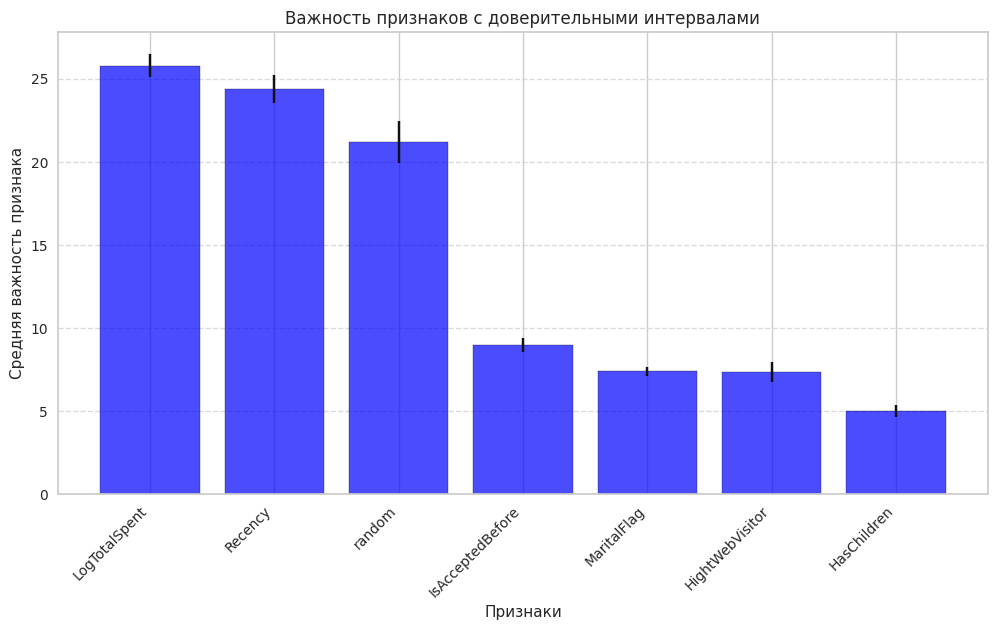

In [352]:
n_iterations = 10
features = list(X.columns) + ['random']

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_records = {feature: [] for feature in features}

# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ –º–Ω–æ–≥–æ —Ä–∞–∑
for _ in tqdm(range(n_iterations)):
    X['random'] = np.random.random(size=len(X))
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
    model.fit(X, y)

    # –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    feature_importance = model.feature_importances_

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å–ª–æ–≤–∞—Ä—å
    for feature, importance in zip(X.columns, feature_importance):
        feature_importance_records[feature].append(importance)

# –°–æ–∑–¥–∞—ë–º DataFrame —Å –∏—Ç–æ–≥–æ–≤—ã–º–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏
feature_importance_stats = pd.DataFrame({
    'feature': list(feature_importance_records.keys()),
    'mean': [np.mean(values) for values in feature_importance_records.values()],
    'std': [np.std(values) for values in feature_importance_records.values()]
}).sort_values(by='mean', ascending=False)

# display(feature_importance_stats)

plt.figure(figsize=(12, 6))
plt.bar(
    feature_importance_stats['feature'], 
    feature_importance_stats['mean'], 
    yerr=feature_importance_stats['std'], 
    capsize=5, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)

plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

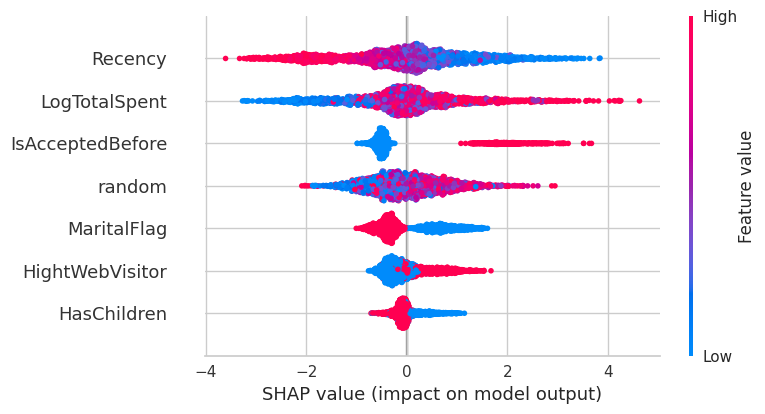

In [353]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
model.fit(X, y)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

In [355]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

display(mi_df.sort_values(by='MI Score', ascending=False))

Feature       MI Score
6          Response 0.422661052875
0  IsAcceptedBefore 0.053019290268
2     LogTotalSpent 0.046057597764
1           Recency 0.020609514361
5       HasChildren 0.011741275863
4       MaritalFlag 0.000675599286
3   HightWebVisitor              0

HightWebVisitor -  –Ω–µ –Ω–µ—Å–µ—Ç –Ω–∏–∫–∞–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –¥–ª—è –º–æ–¥–µ–ª–∏

In [358]:
from sklearn.metrics import f1_score

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:03<00:00,  1.82it/s]


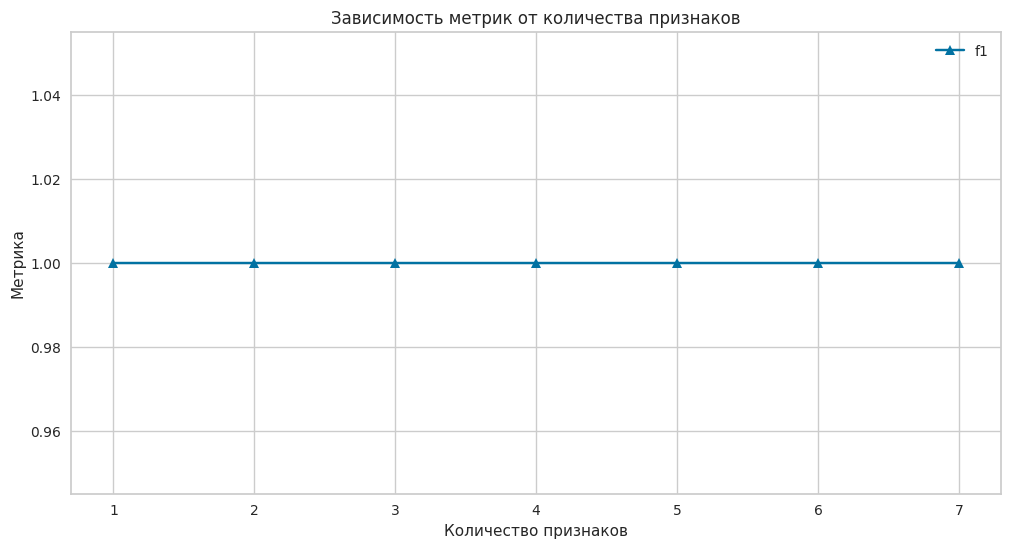

In [362]:
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
model.fit(X, y)

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

features_sorted = feature_importance_df['Feature'].to_list()

f1_values  = []
num_features = []

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏ —Å —Ä–∞–∑–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
for i in tqdm(range(1, len(features_sorted) + 1)):
    
    selected_features = features_sorted[:i]  # –ë–µ—Ä–µ–º –ø–µ—Ä–≤—ã–µ i —Ñ–∏—á
    X_subset = X[selected_features]  # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –≤—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    
    # –°–æ–∑–¥–∞–µ–º –∏ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=False)
    model.fit(X_subset, y)
    
    y_pred = model.predict(X_subset)
    f1 = f1_score(y, y_pred)
    
    f1_values.append(f1)
    num_features.append(i)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(12, 6))
plt.plot(num_features, f1_values, label="f1", marker='^')
plt.xlabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.ylabel("–ú–µ—Ç—Ä–∏–∫–∞")
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ—Ç—Ä–∏–∫ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.legend()
plt.grid(True)
plt.show()

In [363]:
print(f1_values)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [354]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
X = data.select_dtypes(include=['float64', 'int64'])

X_const = add_constant(X)

# –°—á–∏—Ç–∞–µ–º VIF –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

print(vif_data)

            feature            VIF
0  IsAcceptedBefore 1.274821651081
1           Recency 1.051019511619
2     LogTotalSpent 1.313729989469
3   HightWebVisitor 1.066135869441
4       MaritalFlag 1.031493809048
5       HasChildren  1.29103692854
6          Response 1.276021170689


–ú—É–ª—å—Ç–∏–∫–æ–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –Ω–µ—Ç

## –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏

In [ ]:
model_data.head(10)

In [364]:
from sklearn.model_selection import train_test_split
X = data.drop('Response', axis=1)
y = data['Response']

In [365]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

–ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç —ç—Ç–æ—Ç –∫–æ–¥:
- X- –ø—Ä–∏–∑–Ω–∞–∫–∏(—Ñ–∏—á–∏) –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤
- y- —Ç–∞—Ä–≥–µ—Ç(–∫–ª–∞—Å—Å 0 –∏ 1)
- test_size=0.3 - (30% –¥–∞–Ω–Ω—ã—Ö —É–π–¥–µ—Ç –≤ temp)
- random_state=42 - –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏(—á—Ç–æ–±—ã —Ä–∞–∑–±–∏–µ–Ω–∏–µ –±—ã–ª–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –∫–∞–∂–¥—ã–π —Ä–∞–∑)
- stratify=y - —ç—Ç–æ —Å–ø–æ—Å–æ–± —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å—ã –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, –æ—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ –ø—Ä–∏ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Ç–∞—Ä–≥–µ—Ç–µ

–ß—Ç–æ —è –ø–æ–ª—É—á–∞—é?
- X_train –∏ y_train 70% –¥–∞–Ω–Ω—ã—Ö –ø–æ–π–¥—É—Ç –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ
- X_temp –∏ y_temp 30% –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –Ω–∞ val –∏ test


In [366]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

–ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç —ç—Ç–æ—Ç –∫–æ–¥:
- –ø–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ —Ä–∞–∑–±–∏–µ–Ω–∏—è —É –º–µ–Ω—è  –≤ X_temp –∏ y_temp 30% –¥–∞–Ω–Ω—ã—Ö
- test_size=0.5 - –≠—Ç–æ –∑–Ω–∞—á–∏—Ç —á—Ç–æ –∏–∑ —ç—Ç–∏—Ö 30%  15% –ø–æ–π–¥—É—Ç –≤ X_test –∏ y_test, –∞ –æ—Å—Ç–∞–ª—å–Ω—ã–µ 15% –ø–æ–π–¥—É—Ç –≤ X_val –∏ y_val
- stratify=y_temp –ì–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç, —á—Ç–æ –∫–ª–∞—Å—Å—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, 0 –∏ 1) –±—É–¥—É—Ç –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –∫–∞–∫ –≤ –≤–∞–ª–∏–¥–∞—Ü–∏–∏, —Ç–∞–∫ –∏ –≤ —Ç–µ—Å—Ç–µ.

–í –∏—Ç–æ–≥–µ:
- 70% –¥–∞–Ω–Ω—ã—Ö –≤ X_train –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
- 15% –¥–∞–Ω–Ω—ã—Ö –≤ X_val –¥–ª—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
- 15% –¥–∞–Ω–Ω—ã—Ö –≤ X_test –¥–ª—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [367]:
print("–†–∞–∑–º–µ—Ä X_train:", X_train.shape)
print("–†–∞–∑–º–µ—Ä X_val:", X_val.shape)
print("–†–∞–∑–º–µ—Ä X_test:", X_test.shape)
print("–†–∞–∑–º–µ—Ä y_train:", y_train.shape)
print("–†–∞–∑–º–µ—Ä y_test:", y_test.shape)
print("–†–∞–∑–º–µ—Ä y_val:", y_val.shape)

–†–∞–∑–º–µ—Ä X_train: (1560, 6)
–†–∞–∑–º–µ—Ä X_val: (334, 6)
–†–∞–∑–º–µ—Ä X_test: (335, 6)
–†–∞–∑–º–µ—Ä y_train: (1560,)
–†–∞–∑–º–µ—Ä y_test: (335,)
–†–∞–∑–º–µ—Ä y_val: (334,)


In [368]:
data.head(2)

IsAcceptedBefore  Recency  LogTotalSpent  HightWebVisitor  MaritalFlag  \
0                 0       58 7.388946097618                0            0   
1                 0       38 3.332204510175                0            0   

   HasChildren  Response  
0            0         1  
1            1         0

## –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [369]:
from sklearn.preprocessing import MinMaxScaler

In [370]:
# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö (MinMaxScaler)
scaler = MinMaxScaler()

In [371]:
# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
X_train_scaled = scaler.fit_transform(X_train)

In [372]:
# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Baseline

In [381]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

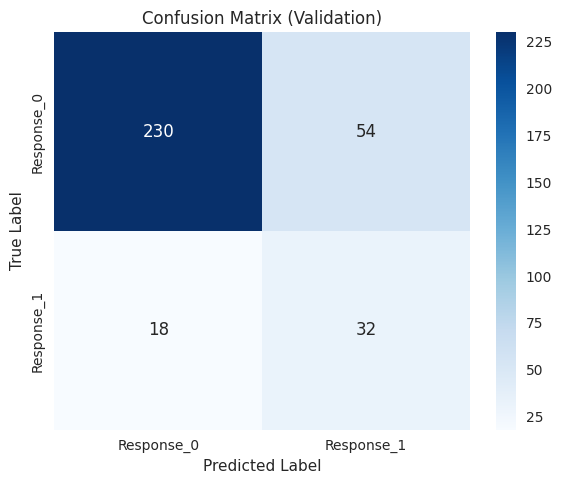

/home/alorozhkov/jup/auto_ml_venv/lib/python3.10/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Logistic_Regression_Baseline' already exists. Creating a new version of this model...
2025/05/18 19:10:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finis

üèÉ View run Logistic_Regression_Baseline at: https://dagshub.com/daryafralova/MLFlow.mlflow/#/experiments/0/runs/1e3c40ff10314058b2352dc962f7aba1
üß™ View experiment at: https://dagshub.com/daryafralova/MLFlow.mlflow/#/experiments/0
Validation Recall: 0.6400


In [386]:
# –ù–∞–∑–≤–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
dataset_name = "Marketing_Response"
target_names = ['Response_0', 'Response_1']

with mlflow.start_run(run_name="Logistic_Regression_Baseline"):

    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
    params = {
        'class_weight': 'balanced',
        'random_state': 42,
        'max_iter': 1000,
        'solver': 'lbfgs',
    }
    mlflow.log_params(params)

    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–º–µ–Ω–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞
    mlflow.log_param("dataset_name", dataset_name)

    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model = LogisticRegression(**params)
    model.fit(X_train_scaled, y_train)

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    y_val_pred = model.predict(X_val_scaled)

    # Recall
    recall = recall_score(y_val, y_val_pred)
    mlflow.log_metric("recall", recall)

    # Confusion Matrix ‚Äî —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∏ –æ—Ç–æ–±—Ä–∞–∑–∏—Ç—å
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix (Validation)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≤ –Ω–æ—É—Ç–±—É–∫–µ
    plt.show()

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏ –ª–æ–≥–∏—Ä—É–µ–º
    plt.savefig("confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("confusion_matrix.png")

    # Classification Report
    report = classification_report(y_val, y_val_pred, target_names=target_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df.to_csv("classification_report.csv")
    mlflow.log_artifact("classification_report.csv")

    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        registered_model_name="Logistic_Regression_Baseline",
        input_example=X_train_scaled[:1],
        signature=mlflow.models.infer_signature(X_train_scaled, y_train)
    )

    # –¢–µ–≥–∏ –∏ –æ–ø–∏—Å–∞–Ω–∏–µ
    mlflow.set_tags({
        "project": "Baseline classification",
        "model_type": "Logistic Regression",
        "dataset": dataset_name
    })

    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–±—â–µ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏
    mlflow.log_param("num_features", X_train.shape[1])
    mlflow.log_param("num_classes", len(target_names))

print(f"Validation Recall: {recall:.4f}")

In [387]:
# –ù–∞–∑–≤–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
dataset_name = "Marketing_Response"
target_names = ['Response_0', 'Response_1']

mlflow.set_experiment("LogisticRegression_Baseline_Threshold_0.3")
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
y_val_probs = model.predict_proba(X_val_scaled)[:, 1]

# –ó–∞–¥–∞–Ω–Ω—ã–π –ø–æ—Ä–æ–≥
threshold = 0.3
y_val_pred_thresh = (y_val_probs >= threshold).astype(int)

# –ú–µ—Ç—Ä–∏–∫–∞ recall –ø—Ä–∏ –∏–∑–º–µ–Ω—ë–Ω–Ω–æ–º –ø–æ—Ä–æ–≥–µ
recall_thresh = recall_score(y_val, y_val_pred_thresh)
print(f"Recall –ø—Ä–∏ –ø–æ—Ä–æ–≥–µ = {threshold}: {recall_thresh:.4f}")

# –õ–æ–≥–∏—Ä—É–µ–º –≤ MLflow
mlflow.log_param("threshold", threshold)
mlflow.log_metric("recall@threshold", recall_thresh)

2025/05/18 19:18:19 INFO mlflow.tracking.fluent: Experiment with name 'LogisticRegression_Baseline_Threshold_0.3' does not exist. Creating a new experiment.


Recall –ø—Ä–∏ –ø–æ—Ä–æ–≥–µ = 0.3: 0.8800


RestException: INVALID_PARAMETER_VALUE: Response: {'error_code': 'INVALID_PARAMETER_VALUE'}

## AutoML - Pycaret

–ò—Å–ø–æ–ª—å–∑—É—é  X_train_scaled –∏ y_train –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –≤ PyCaret
–ü–æ—Å–ª–µ –≤—ã–±–æ—Ä–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø—Ä–æ–≤–µ—Ä—é –µ–µ –Ω–∞ X_val_scaled –∏ X_test_scaled

In [ ]:
X_train_scaled

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
# –û–±—ä–µ–¥–∏—é —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
train_df = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True).rename("Response")], axis=1)

In [ ]:
train_df

In [ ]:
class_balance = train_df['Response'].value_counts()

print(class_balance)

In [ ]:
clf_setup = setup(
    data=train_df,
    target='Response',
    fold=10,        
    session_id=42,
    train_size=0.9,          
    normalize=False,          # –£–∂–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–æ
    fix_imbalance=True,       # –í–∫–ª—é—á–∞–µ–º –∞–≤—Ç–æ-–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫—É –∏–∑-–∑–∞ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞
)

In [ ]:
best_model_second = compare_models(sort='Recall')

### –ê–Ω–∞–ª–∏–∑ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ DataFrame
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_train.columns)

In [ ]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å —Ç–∞—Ä–≥–µ—Ç–æ–º
val_df = pd.concat([X_val_scaled_df, y_val.reset_index(drop=True).rename("Response")], axis=1)

In [ ]:
final_model_2 = finalize_model(best_model_second)
predictions_2 = predict_model(final_model_2, data=val_df)  # X_val_scaled + y_val

In [ ]:
plot_model(final_model_2, plot='feature')

### C–ª—É—á–∞–π–Ω–∞—è —Ñ–∏—á–∞ + feature importance

## –¢—Ä–µ–∫–∏–Ω–≥ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
# –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤ MLflow
with mlflow.start_run():
    mlflow.log_param("Model", "SVM - Linear Kernel")
    
    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # –ü—Ä–æ–≥–Ω–æ–∑—ã –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    y_pred_svm = svm_model.predict(X_val_scaled)

    # –õ–æ–≥–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫–∏
    recall = recall_score(y_val, y_pred_svm)
    precision = precision_score(y_val, y_pred_svm)
    f1 = f1_score(y_val, y_pred_svm)

    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("F1", f1)

    # –õ–æ–≥–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
    mlflow.sklearn.log_model(svm_model, "model")

    print(f"SVM Recall: {recall}")
    print(f"SVM Precision: {precision}")
    print(f"SVM F1: {f1}")

In [ ]:
# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ —Ç—ã —É–∂–µ –æ–±—É—á–∏–ª –º–æ–¥–µ–ª—å –∏ —É —Ç–µ–±—è –µ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_svm_proba = svm_model.decision_function(X_val_scaled)  # –∏–ª–∏ –ª—é–±–∞—è –¥—Ä—É–≥–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å, –µ—Å–ª–∏ –µ—Å—Ç—å

# –°—Ç—Ä–æ–∏–º ROC-–∫—Ä–∏–≤—É—é
fpr, tpr, thresholds = roc_curve(y_val, y_pred_svm_proba)
roc_auc = auc(fpr, tpr)

# –õ–æ–≥–∏—Ä—É–µ–º ROC-–∫—Ä–∏–≤—É—é
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
plt.savefig("roc_curve.png")

# –õ–æ–≥–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ MLflow
with mlflow.start_run():
    mlflow.log_artifact("roc_curve.png")

In [ ]:
# –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤ MLflow
with mlflow.start_run():
    mlflow.log_param("Model", "Logistic Regression")
    
    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å Logistic Regression
    logreg_model = LogisticRegression(random_state=42)
    logreg_model.fit(X_train_scaled, y_train)

    # –ü—Ä–æ–≥–Ω–æ–∑—ã –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    y_pred_logreg = logreg_model.predict(X_val_scaled)

    # –õ–æ–≥–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫–∏
    recall = recall_score(y_val, y_pred_logreg)
    precision = precision_score(y_val, y_pred_logreg)
    f1 = f1_score(y_val, y_pred_logreg)

    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("F1", f1)

    # –õ–æ–≥–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
    mlflow.sklearn.log_model(logreg_model, "model")

    print(f"Logistic Regression Recall: {recall}")
    print(f"Logistic Regression Precision: {precision}")
    print(f"Logistic Regression F1: {f1}")